# Capstone Project - NLP based Chatbot

**Group**: G9

**Batch**: AIML ONLINE JULY 23 A

**Team Members**:
* Anurag Rai
* Neha Gogia
* Prasanalakshmi Venkateswaralu
* Rahul Sagar
* Rohon Kuddus
* Suhail Chand

# Problem Statement

**DOMAIN**: Industrial Safety

**CONTEXT**: <br>
The  database  comes  fromone  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

**DATA DESCRIPTION**:<br>
This  The  database  is  basically  records  of  accidents  from12  different  plants  in  03  different  countrieswhich  every  line  in  the  data  is  an occurrence of an accident.

**Source**: https://www.kaggle.com/datasets/ihmstefanini/industrial-safety-and-health-analytics-database

| Attributes | Description |
| ------------- | ------------- |
| Data | timestamp or time/date information |
| Countries | which country the accident occurred (anonymised) |
| Local | the city where the manufacturing plant is located (anonymised) |
| Industry sector | which sector the plant belongs to |
| Accident level | from I to VI, it registers how severe was the accident (I means not severe but VI means very severe) |
| Potential Accident Level | depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident) |
| Genre | if the person is male of female |
| Employee or Third Party | if the injured person is an employee or a third party |
| Critical Risk | some description of the risk involved in the accident |
| Description | detailed description of how the accident happened | 

**PROJECT OBJECTIVE**:<br>
Design a ML/DL based chatbot utility which can help the professionals to **highlight the safety risk** as per the incident description.

# Imports

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from IPython.display import display_html

# Command to tell Python to actually display the graphs
%matplotlib inline

# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn import svm

from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_val_score

from scipy import stats

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

import pickle

import warnings
warnings.filterwarnings("ignore")

In [ ]:
is_df = pd.read_excel('Health_database.xlsx')
is_df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
is_df.shape

(425, 11)

In [ ]:
# Dataset Info
is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


In [ ]:
# Missing value count
is_df.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [ ]:
# Dropping the index column
is_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Duplicates
is_df.duplicated().sum()

7

In [ ]:
# Dropping duplicates
is_df.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
print('Value Counts')
print('*'*50)
for col in is_df.columns:
    if col not in ['Data', 'Description']:
        print(is_df[col].value_counts())
        print('-'*50)

Value Counts
**************************************************
Countries
Country_01    248
Country_02    129
Country_03     41
Name: count, dtype: int64
--------------------------------------------------
Local
Local_03    89
Local_05    59
Local_01    56
Local_04    55
Local_06    46
Local_10    41
Local_08    27
Local_02    23
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64
--------------------------------------------------
Industry Sector
Mining    237
Metals    134
Others     47
Name: count, dtype: int64
--------------------------------------------------
Accident Level
I      309
II      40
III     31
IV      30
V        8
Name: count, dtype: int64
--------------------------------------------------
Potential Accident Level
IV     141
III    106
II      95
I       45
V       30
VI       1
Name: count, dtype: int64
--------------------------------------------------
Genre
Male      396
Female     22
Name: count, dtype: int64
----------------------

In [ ]:
# Rename 'Data', 'Countries', 'Genre' columns in Data frame
is_df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender'}, inplace=True)

# Univariate Analysis

In [ ]:
def labeled_barplot(data, feature, perc=False):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    
    """

    figure,axes = plt.subplots(nrows =1,ncols = 2,figsize=(20,10))
    data[feature].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
    total = len(data[feature])  # length of the column
    plt.xticks(rotation=90)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index,ax = axes[1]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:1.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
    ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

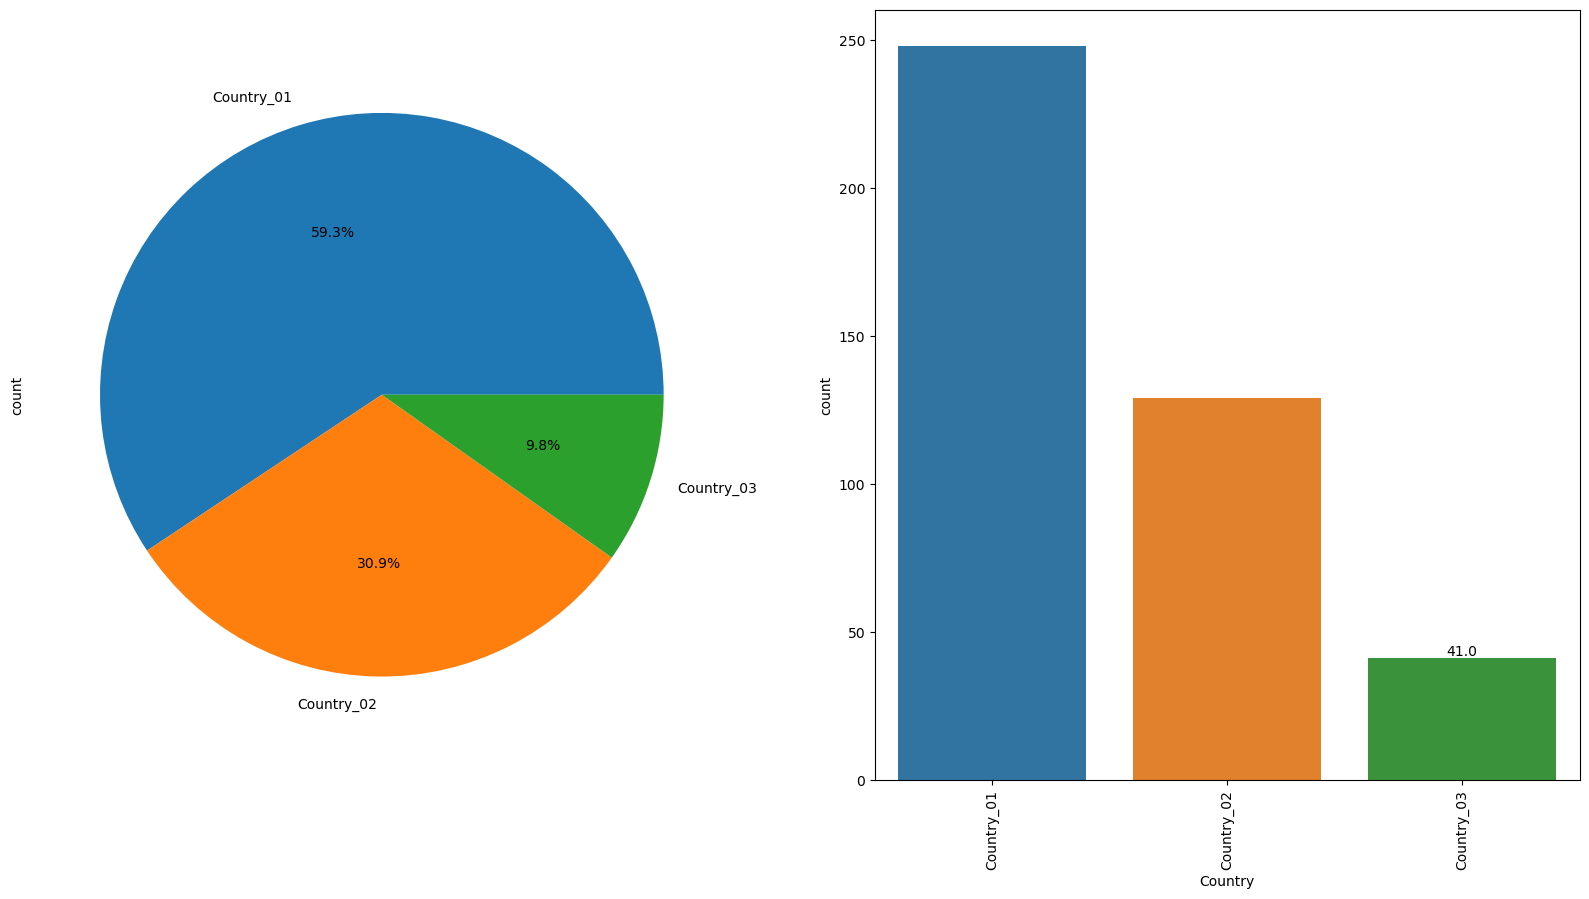

In [ ]:
# Country distribution
labeled_barplot(is_df, 'Country', perc=False)

Higher percentage of accidents almost 59% has occured in Country_01 Least percentage of accidents, 9.8% has occurred in Country_03.

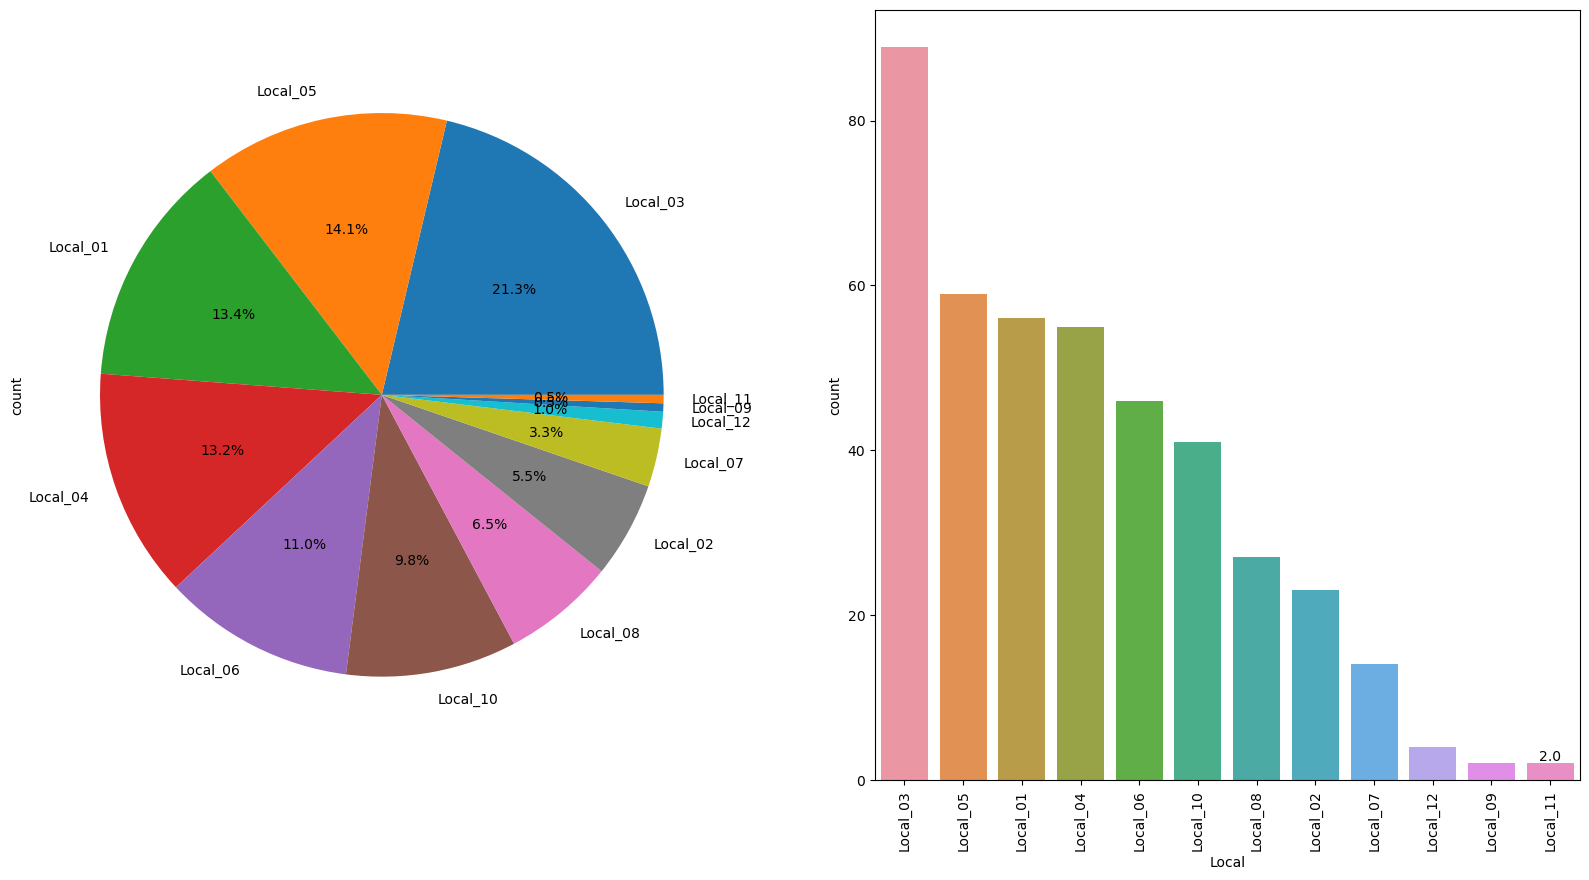

In [ ]:
# Local region distribution
labeled_barplot(is_df, 'Local', perc=False)

Higher pecentage of accidents has occured in `Local_03` Second highest accident has occurred in `Local_05`.

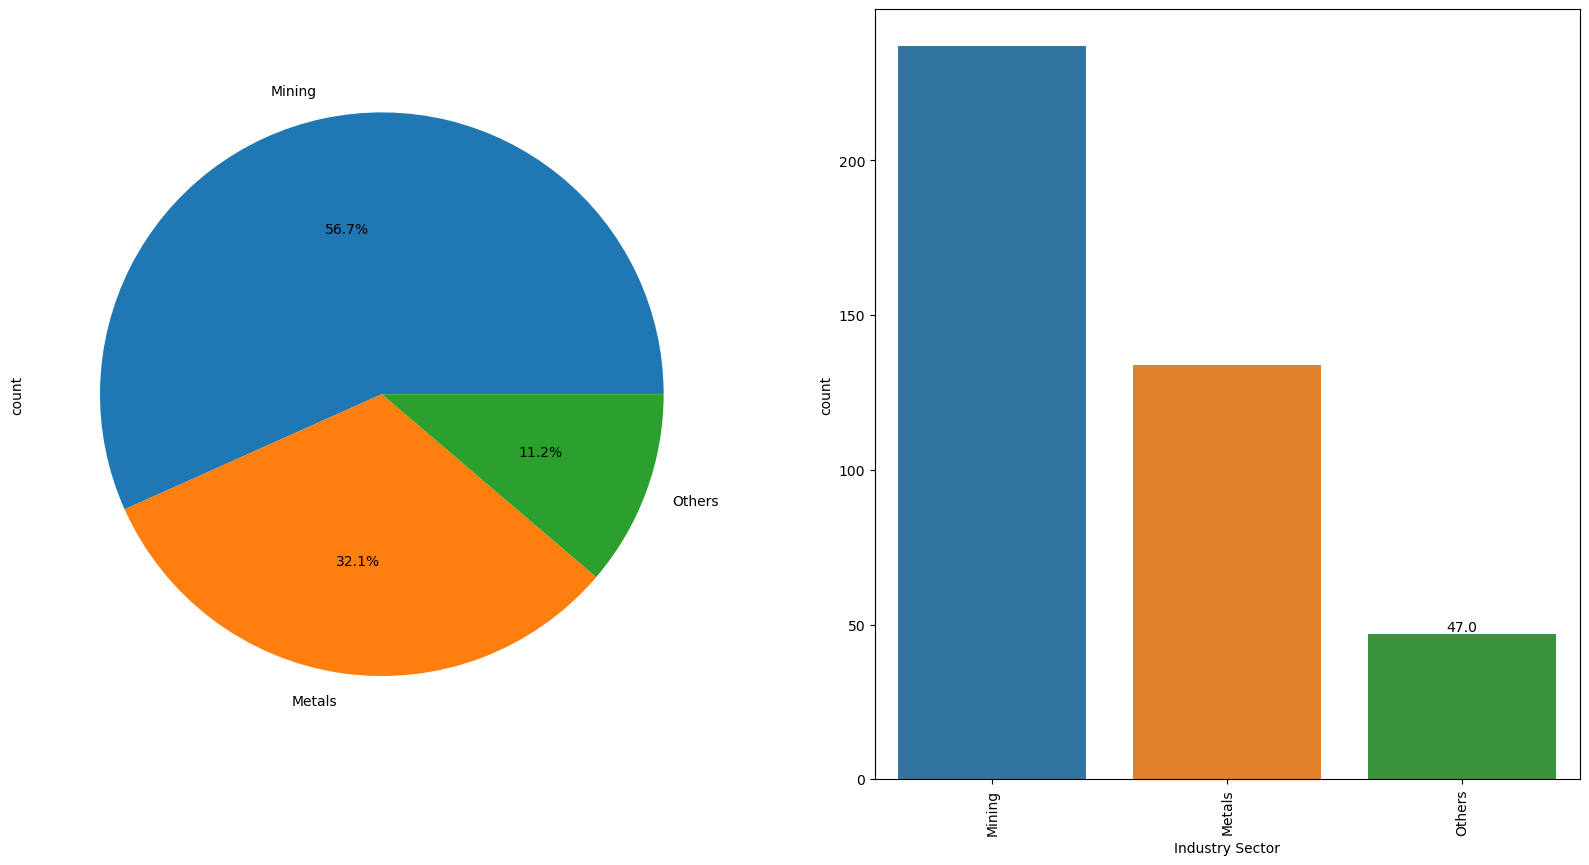

In [ ]:
# Industry Sector distribution
labeled_barplot(is_df, 'Industry Sector', perc=False)

Higher percentage, ~ 56.7% of accidents has occurred in Mining industy Second highest in Metals.

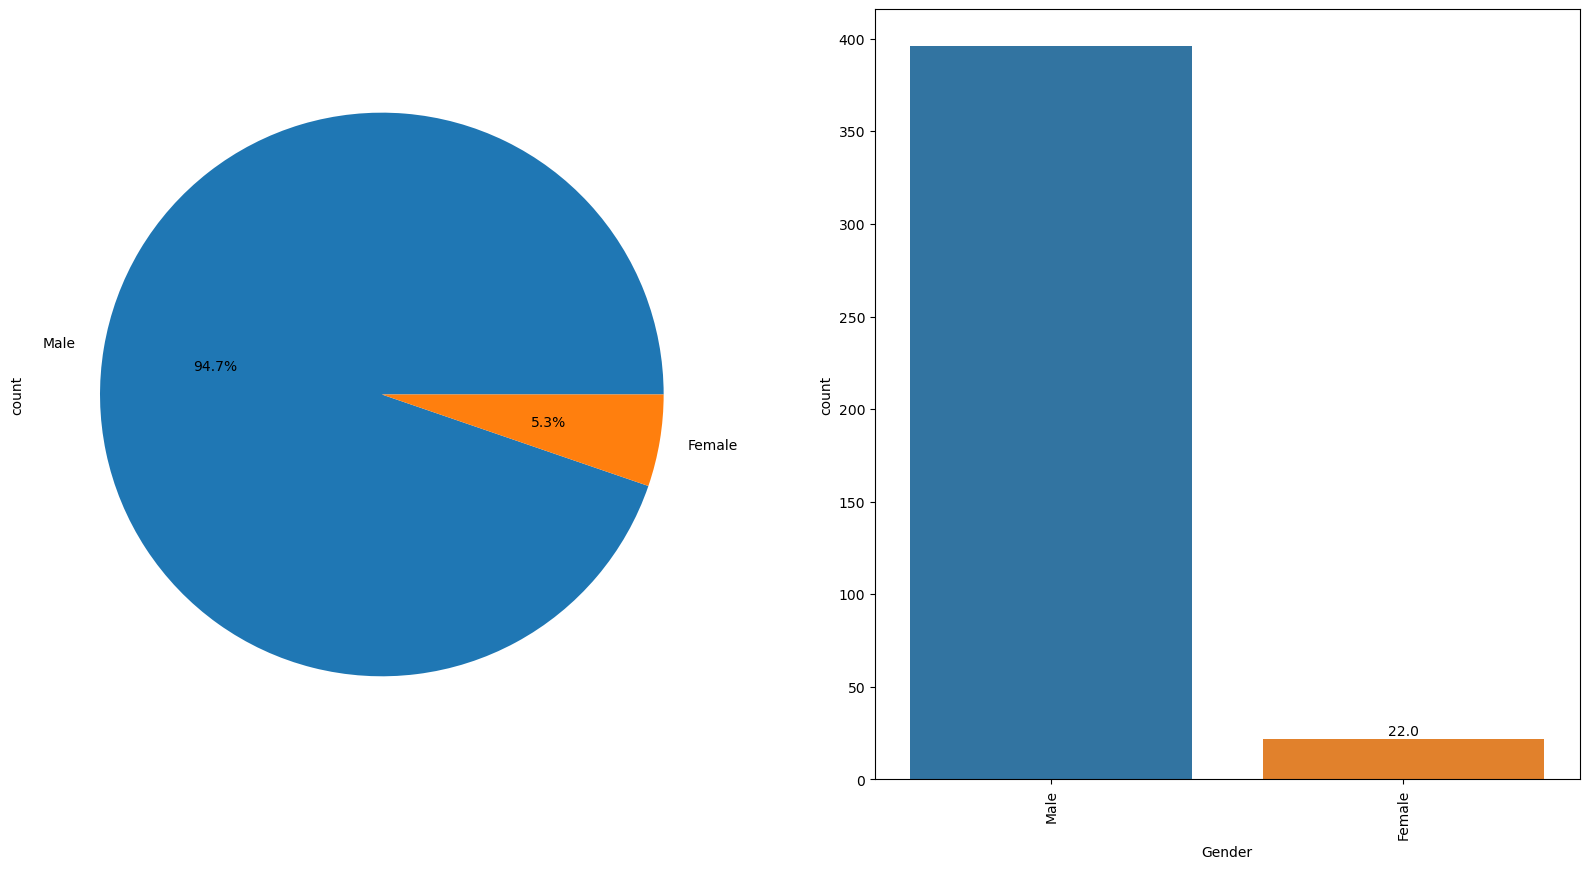

In [ ]:
# Gender distribution
labeled_barplot(is_df, 'Gender', perc=False)

Men have undergone higher percentage of accidents around ~94.7% Women has less accident rate.

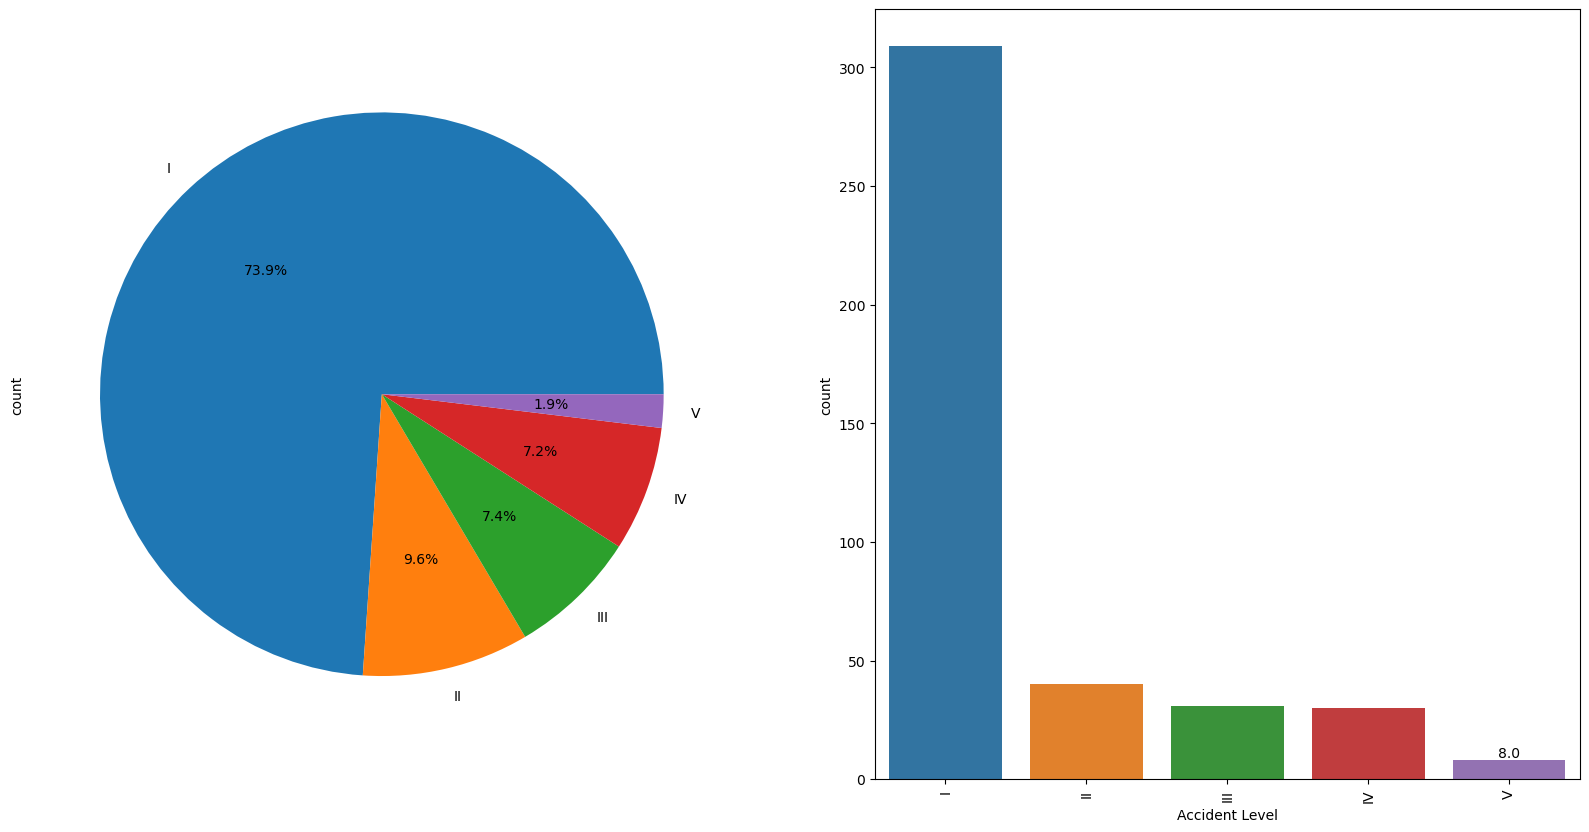

In [ ]:
# Accident Level distribution
labeled_barplot(is_df, 'Accident Level', perc=False)

8% of accidents were very severe considering level `V` as highest severe. Higher no of accidents happened are less severe ~ 74 %.

In [ ]:
ds = is_df['Critical Risk'].value_counts().reset_index()
ds.columns = ['Critical Risk', 'count']
ds = ds.sort_values(['count'],ascending=False)

In [ ]:
ds.head()

,Critical Risk,count
0,Others,229
1,Pressed,24
2,Manual Tools,20
3,Chemical substances,17
4,Cut,14


Text(0.5, 1.0, 'Top 20 Critical Risk reported...')

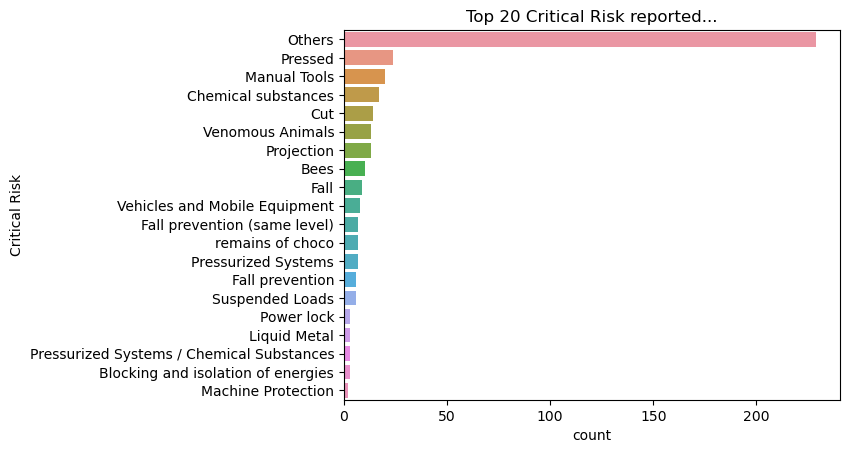

In [ ]:
ds = is_df['Critical Risk'].value_counts().reset_index()
ds.columns = ['Critical Risk', 'count']
ds = ds.sort_values(['count'],ascending=False)

sns.barplot(
    x='count', 
    y='Critical Risk', 
    data = ds.head(20)
).set_title('Top 20 Critical Risk reported...')

Critical risk needs to further collected since most of the falls into other category. Pressed is the second most critical risk reported.

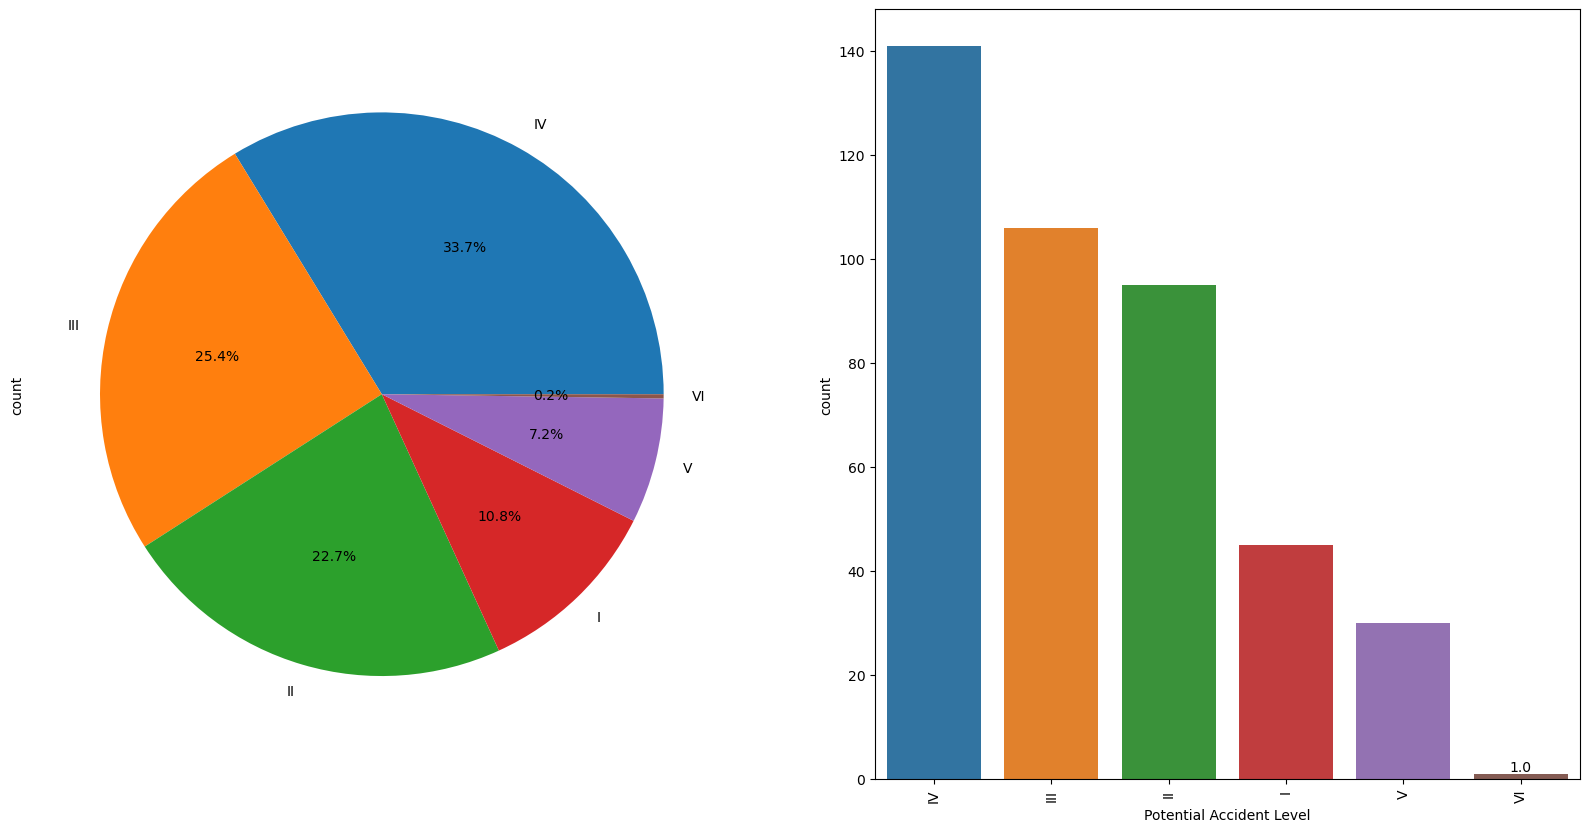

In [ ]:
# Potential Accident Level distribution
labeled_barplot(is_df, 'Potential Accident Level', perc=False)

Most of accidents are of potential level `IV`.

# Bivariate Analysis

In [ ]:
#Defining a function
def crosstab_feature(dataframe,index,column,stack):
    Country_Local_table = pd.crosstab(index = dataframe[index], columns = dataframe[column])
    #ax =Country_Local_table.plot(kind = 'bar', figsize=(8,8))
    ax =Country_Local_table.plot(kind = 'bar', figsize=(8,5),stacked = stack)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
    # add annotations if desired
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
       # plt.title("Proportion of",column,"in different",index)
    plt.show()  # show the plot

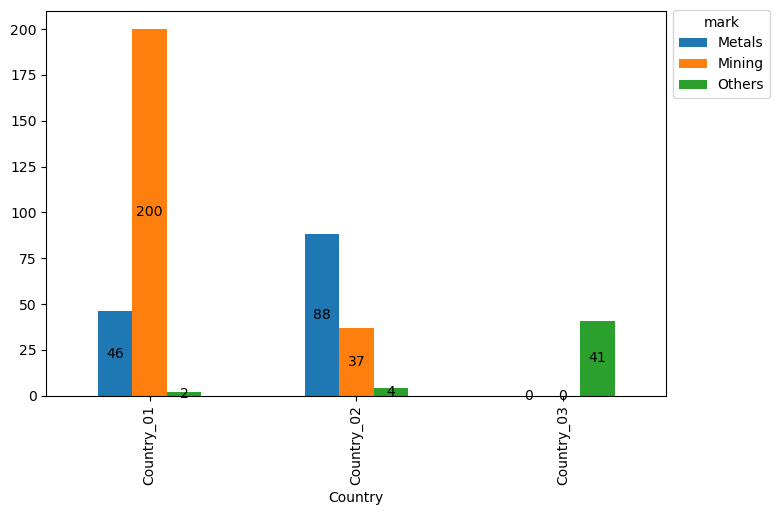

In [ ]:
# Check proportion of Industry sector in different countries
crosstab_feature(is_df, 'Country', 'Industry Sector', False)

`Country_01` has highest percentage of accidents occuring is `Mining` industy, `Country_02` has highest percentage of accidents occurring in `Metal` industry, `Country_03` has highest percentage of accidents occurring in `Others` industry.

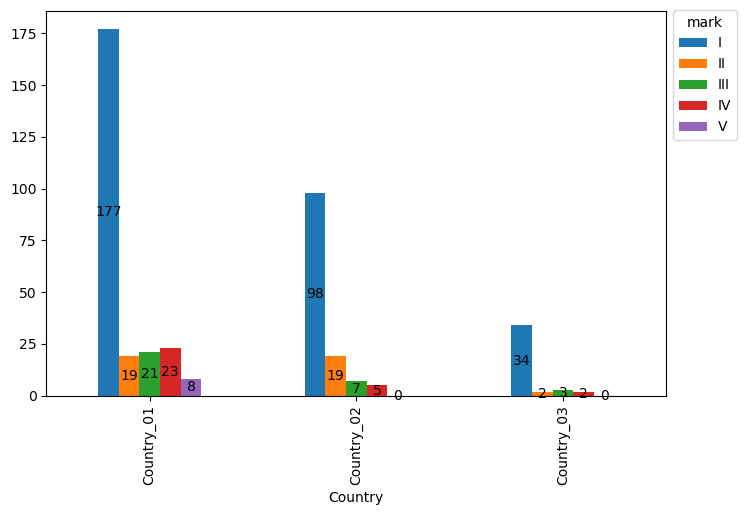

In [ ]:
# Proportion of accident level in different coutries
crosstab_feature(is_df, 'Country', 'Accident Level', False)

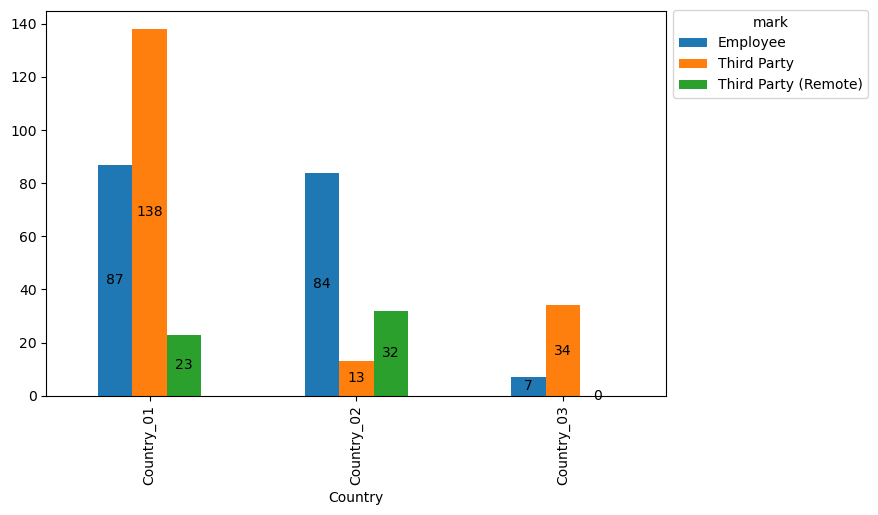

In [ ]:
# Proportion of employee type in different coutries
crosstab_feature(is_df,'Country','Employee or Third Party',False)

Third party undergoing more accidents in Country 1 & 3
Employee under country 1 & Country 2 facing same accident rates

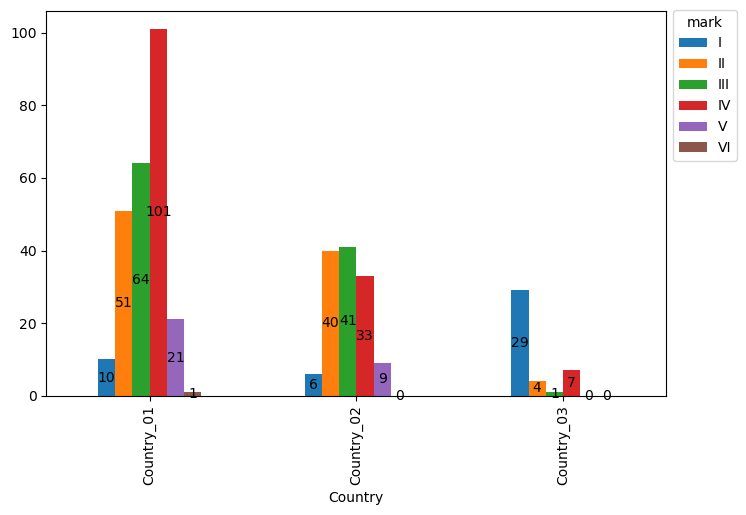

In [ ]:
#Proportion of Potential accident level in different coutries
crosstab_feature(is_df,'Country','Potential Accident Level',False)

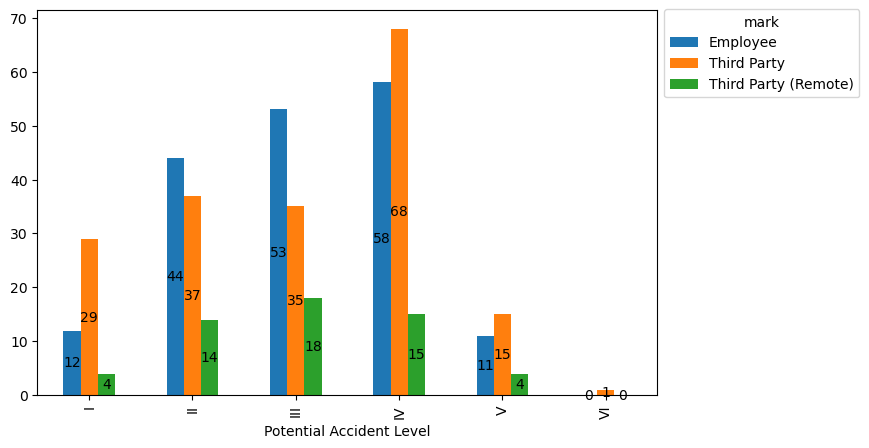

In [ ]:
#Potential Accident Level vs Employee Type distribution
crosstab_feature(is_df,'Potential Accident Level','Employee or Third Party',False)

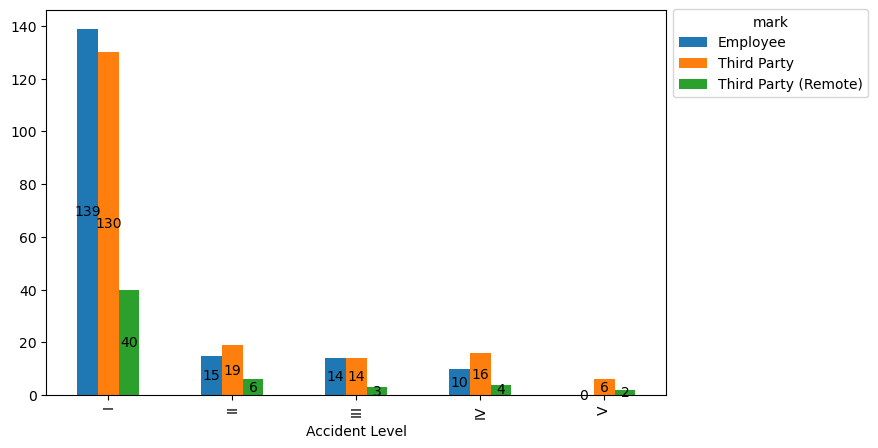

In [ ]:
crosstab_feature(is_df,'Accident Level','Employee or Third Party',False)

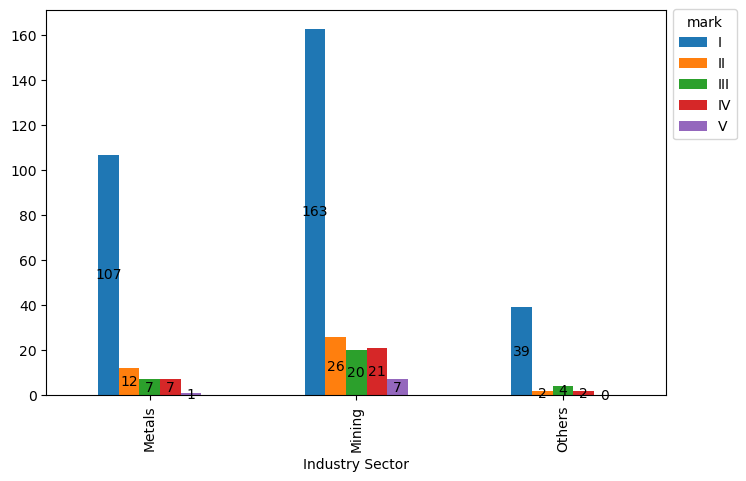

In [ ]:
crosstab_feature(is_df,'Industry Sector','Accident Level',False)

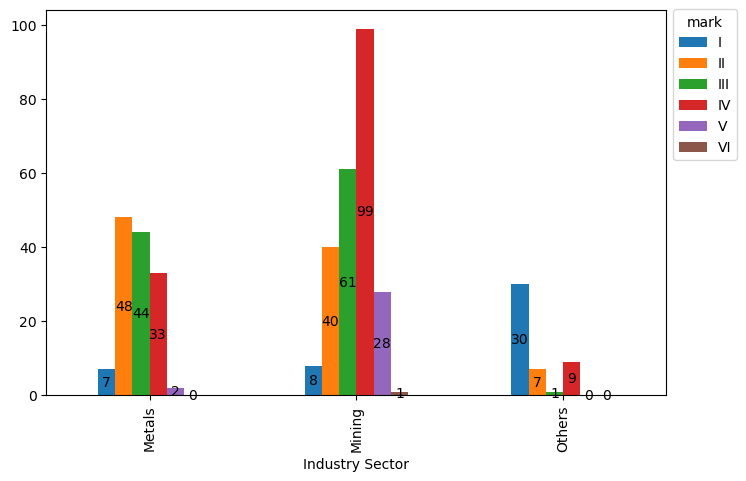

In [ ]:
crosstab_feature(is_df,'Industry Sector','Potential Accident Level',False)


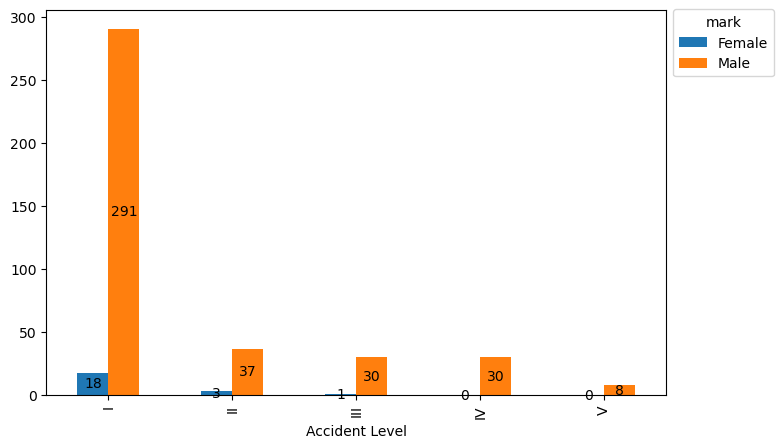

In [ ]:
crosstab_feature(is_df,'Accident Level','Gender',False)

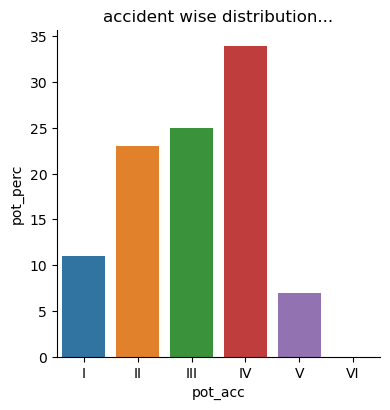

In [ ]:
acc_cnt = np.round(is_df['Accident Level'].value_counts(normalize=True) * 100)
acc_cnt = pd.DataFrame({'acc':acc_cnt.index, 'perc':acc_cnt.values})
pot_acc_cnt = np.round(is_df['Potential Accident Level'].value_counts(normalize=True) * 100)
pot_acc_cnt = pd.DataFrame({'pot_acc':pot_acc_cnt.index, 'pot_perc':pot_acc_cnt.values})
acc_cnt = acc_cnt.sort_values(by=['acc'], ascending=True).reset_index(drop=True)
pot_acc = pot_acc_cnt.sort_values(by=['pot_acc'], ascending=True).reset_index(drop=True)
result = pd.concat([acc_cnt, pot_acc], axis=1, join="outer")
result.fillna(0, inplace=True)
fig = sns.catplot(
    data=result, x="pot_acc", y="pot_perc",
    kind="bar", height=4, 
).set(title='accident wise distribution...')

# Treating Attribute data

In [ ]:
# Label encoding
is_df['Gender'] = is_df['Gender'].apply(lambda x: {'Male': 0, 'Female': 1}[x])
is_df['Accident Level'] = is_df['Accident Level'].apply(lambda x: {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}[x])
is_df['Potential Accident Level'] = is_df['Potential Accident Level'].apply(lambda x: {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}[x])

is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Country                   418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    int64         
 5   Potential Accident Level  418 non-null    int64         
 6   Gender                    418 non-null    int64         
 7   Employee or Third Party   418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 32.8+ KB


In [ ]:
# Dropping datetime info
is_df.drop(['Date'], axis=1, inplace=True)

In [ ]:
# One-hot encoding
is_df = pd.get_dummies(is_df, columns=['Country', 'Local', 'Industry Sector', 'Employee or Third Party', 'Critical Risk'], dtype=np.int64)

In [ ]:
is_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Accident Level                                           418 non-null    int64 
 1   Potential Accident Level                                 418 non-null    int64 
 2   Gender                                                   418 non-null    int64 
 3   Description                                              418 non-null    object
 4   Country_Country_01                                       418 non-null    int64 
 5   Country_Country_02                                       418 non-null    int64 
 6   Country_Country_03                                       418 non-null    int64 
 7   Local_Local_01                                           418 non-null    int64 
 8   Local_Local_02                          

# Description

In [ ]:
# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')  

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nehag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nehag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# To lowercase
is_df['Description_T'] = is_df['Description'].apply(lambda x: x.lower())

In [ ]:
# Removing non-alphanumeric chars
is_df['Description_T'] = is_df['Description_T'].apply(lambda x: ''.join(re.sub('[^A-Za-z0-9]+', ' ', x)))

In [ ]:
# Removing extra white spaces
is_df['Description_T'] = is_df['Description_T'].str.strip()

In [ ]:
# Stopword removal
is_df['Description_T'] = is_df['Description_T'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

In [ ]:
is_df.loc[0:10, ['Description', 'Description_T']]

,Description,Description_T
0,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo 08 maintenance superv...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump piping uncoupl...
2,In the sub-station MILPO located at level +170...,sub station milpo located level 170 collaborat...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approximately nv 1880 cx 695 ob7 personne...
4,Approximately at 11:45 a.m. in circumstances t...,approximately 11 45 circumstances mechanics an...
5,During the unloading operation of the ustulado...,unloading operation ustulado bag need unclog d...
6,The collaborator reports that he was on street...,collaborator reports street 09 holding left ha...
7,"At approximately 04:50 p.m., when the mechanic...",approximately 04 50 p mechanic technician jos ...
8,Employee was sitting in the resting area at le...,employee sitting resting area level 326 raise ...
9,At the moment the forklift operator went to ma...,moment forklift operator went manipulate big b...


In [ ]:
#dataset will be used for BOW/N-gram
is_df1=is_df.copy()

In [ ]:
#Lemmitization
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
is_df['Description_WL'] = is_df.apply(lambda row: nltk.word_tokenize(row['Description_T']), axis=1)
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return ' '.join(new_words)
is_df['Description_WL'] = is_df.apply(lambda x: lemmatize_list(x['Description_WL']), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nehag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
is_df.loc[0:10, ['Description', 'Description_WL']]

,Description,Description_WL
0,While removing the drill rod of the Jumbo 08 f...,remove drill rod jumbo 08 maintenance supervis...
1,During the activation of a sodium sulphide pum...,activation sodium sulphide pump pip uncouple s...
2,In the sub-station MILPO located at level +170...,sub station milpo locate level 170 collaborato...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approximately nv 1880 cx 695 ob7 personne...
4,Approximately at 11:45 a.m. in circumstances t...,approximately 11 45 circumstances mechanics an...
5,During the unloading operation of the ustulado...,unload operation ustulado bag need unclog disc...
6,The collaborator reports that he was on street...,collaborator report street 09 hold leave hand ...
7,"At approximately 04:50 p.m., when the mechanic...",approximately 04 50 p mechanic technician jos ...
8,Employee was sitting in the resting area at le...,employee sit rest area level 326 raise bore su...
9,At the moment the forklift operator went to ma...,moment forklift operator go manipulate big bag...


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_df = pd.DataFrame()
for i in [1,2]:
    tfidf = TfidfVectorizer(max_features=50, stop_words='english',use_idf=True, ngram_range=(i,i))
    X = tfidf.fit_transform(is_df['Description_WL']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in tfidf.get_feature_names_out()])
    tfidf_df = pd.concat([tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

tfidf_df.head(5)

,TFIDF_accident,TFIDF_activity,TFIDF_approximately,TFIDF_area,TFIDF_assistant,TFIDF_carry,TFIDF_cause,TFIDF_clean,TFIDF_collaborator,TFIDF_come,...,TFIDF_safety gloves,TFIDF_split set,TFIDF_support mesh,TFIDF_time accident,TFIDF_time event,TFIDF_transfer medical,TFIDF_use safety,TFIDF_wear safety,TFIDF_work area,TFIDF_worker wear
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.473920,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.259838,0.000000,0.0,0.169450,0.0,0.531202,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.331691,0.000000,0.333896,0.0,0.195598,0.0,0.000000,0.350788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.297918,0.000000,0.000000,0.0,0.175682,0.0,0.000000,0.315070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
nlp_chatbot_TF_IDF= is_df.join(tfidf_df.reset_index(drop=True))

In [ ]:
nlp_chatbot_TF_IDF.drop(['Description','Description_T','Description_WL'],axis=1,inplace=True)

In [ ]:
nlp_chatbot_TF_IDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 157 entries, Accident Level to TFIDF_worker wear
dtypes: float64(100), int64(57)
memory usage: 512.8 KB


In [ ]:
nlp_chatbot_TF_IDF.to_csv('nlp_chatbot_TF_IDF.csv', index=False)

# BOW

In [ ]:
# Stemming
ps = PorterStemmer()
is_df1['Description_PS'] = is_df1['Description_T'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
is_df1.loc[0:10, ['Description', 'Description_PS']]

,Description,Description_PS
0,While removing the drill rod of the Jumbo 08 f...,remov drill rod jumbo 08 mainten supervisor pr...
1,During the activation of a sodium sulphide pum...,activ sodium sulphid pump pipe uncoupl sulfid ...
2,In the sub-station MILPO located at level +170...,sub station milpo locat level 170 collabor exc...
3,Being 9:45 am. approximately in the Nv. 1880 C...,9 45 approxim nv 1880 cx 695 ob7 personnel beg...
4,Approximately at 11:45 a.m. in circumstances t...,approxim 11 45 circumst mechan anthoni group l...
5,During the unloading operation of the ustulado...,unload oper ustulado bag need unclog discharg ...
6,The collaborator reports that he was on street...,collabor report street 09 hold left hand volum...
7,"At approximately 04:50 p.m., when the mechanic...",approxim 04 50 p mechan technician jo tecnomin...
8,Employee was sitting in the resting area at le...,employe sit rest area level 326 rais bore suff...
9,At the moment the forklift operator went to ma...,moment forklift oper went manipul big bag biox...


In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)
bow_feat = bow_vec.fit_transform(is_df1['Description_PS'])

bow_feat = bow_feat.toarray()
bow_feat.shape

(418, 1000)

In [ ]:
# Set of unique words considered by the vectorizer
bow_vec.get_feature_names_out()

array(['00', '01', '018', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '100', '11', '12', '13', '14', '15', '16', '17', '1710',
       '18', '1850', '187', '1880', '19', '1940', '1st', '20', '200',
       '2016', '2017', '22', '24', '25', '26', '27', '2900', '2930',
       '2995', '2m', '2nd', '30', '326', '3300', '3450', '3490', '35',
       '350', '3cm', '3m', '3rd', '40', '440', '45', '4th', '50', '500',
       '54', '5th', '60', '6m', '70', '75', '80', '90', '903', 'abl',
       'abruptli', 'absorb', 'access', 'accessori', 'accid', 'accident',
       'accommod', 'accompani', 'accord', 'accumul', 'acid', 'across',
       'action', 'activ', 'addit', 'adjust', 'advanc', 'affect', 'ahead',
       'aid', 'air', 'albino', 'align', 'allerg', 'allergi', 'alon',
       'along', 'alpha', 'alreadi', 'aluminum', 'amount', 'ampoload',
       'anchor', 'anfoload', 'angl', 'ankl', 'anod', 'anoth', 'appar',
       'appli', 'approach', 'approx', 'approxim', 'arc', 'area',
       'ar

In [ ]:
bow_df = pd.DataFrame(bow_feat, columns=[f'cv_{vec}' for vec in bow_vec.get_feature_names_out()])
bow_df.head()

,cv_00,cv_01,cv_018,cv_02,cv_03,cv_04,cv_05,cv_06,cv_07,cv_08,...,cv_wore,cv_work,cv_worker,cv_workshop,cv_would,cv_wound,cv_wrench,cv_wrist,cv_zinc,cv_zone
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
bow_ds = pd.concat([is_df1, bow_df], axis=1).drop(['Description', 'Description_T', 'Description_PS'], axis=1)
bow_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 1057 entries, Accident Level to cv_zone
dtypes: int64(1057)
memory usage: 3.4 MB


In [ ]:
bow_ds.to_csv('ps_bow.csv', index=False)

In [ ]:
bow_ds.shape

(418, 1057)

# N-Gram

In [ ]:
# Initializing CountVectorizer with top 1000 words
n2g_vec = CountVectorizer(max_features = 1000, ngram_range=(2, 2))
n2g_feat = n2g_vec.fit_transform(is_df1['Description_PS'])

n2g_feat = n2g_feat.toarray()
n2g_feat.shape

(418, 1000)

In [ ]:
# Set of unique words considered by the vectorizer
n2g_vec.get_feature_names_out()

array(['00 approxim', '00 pm', '02 2017', '02 employe', '02 sting',
       '02bp0166 chang', '031 remov', '04 member', '10 00', '10 cm',
       '10 day', '10 mr', '10mx0 40m', '11 45', '12 20', '12 cell',
       '13 40', '15 20', '15 kg', '15 meter', '15 oper', '15mx0 10m',
       '16 oper', '1710 cx', '18 40', '1880 cx', '1st degre', '20 meter',
       '2nd finger', '30 approxim', '40 hour', '45 pm', '50 approxim',
       '50 meter', '500 kg', '5th finger', 'access aripuan',
       'access ladder', 'accid employe', 'accid oper', 'accid victim',
       'accid worker', 'accompani geologist', 'activ area',
       'activ employe', 'activ evacu', 'activ follow', 'activ paralyz',
       'activ remov', 'air valv', 'allerg reaction', 'ampoload team',
       'approx 500', 'approxim 20', 'approxim height', 'approxim meter',
       'approxim nv', 'area allerg', 'area proceed', 'area stop',
       'area supervis', 'area verifi', 'aripuan area', 'arm one',
       'arm right', 'arm uniform', 'aroun

In [ ]:
n2g_df = pd.DataFrame(n2g_feat, columns=[f'cv_{vec}' for vec in n2g_vec.get_feature_names_out()])
n2g_df.head()

,cv_00 approxim,cv_00 pm,cv_02 2017,cv_02 employe,cv_02 sting,cv_02bp0166 chang,cv_031 remov,cv_04 member,cv_10 00,cv_10 cm,...,cv_worker use,cv_worker wear,cv_workshop level,cv_would enter,cv_wound left,cv_wound right,cv_wound sole,cv_wrist left,cv_zaro team,cv_zinc sheet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
n2g_ds = pd.concat([is_df1, n2g_df], axis=1).drop(['Description', 'Description_T', 'Description_PS'], axis=1)
n2g_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 1057 entries, Accident Level to cv_zinc sheet
dtypes: int64(1057)
memory usage: 3.4 MB


In [ ]:
n2g_ds.to_csv('ps_bigram.csv', index=False)

In [ ]:
n2g_ds.shape

(418, 1057)

In [ ]:
# Trigram
n3g_vec = CountVectorizer(max_features = 1000, ngram_range=(3, 3))
n3g_feat = n3g_vec.fit_transform(is_df1['Description_PS'])
n3g_feat = n3g_feat.toarray()
n3g_df = pd.DataFrame(n3g_feat, columns=[f'cv_{vec}' for vec in n3g_vec.get_feature_names_out()])
n3g_ds = pd.concat([is_df1, n3g_df], axis=1).drop(['Description', 'Description_T', 'Description_PS'], axis=1)
n3g_ds.to_csv('ps_trigram.csv', index=False)
n3g_vec.get_feature_names_out()

array(['02 2017 10', '02 employe insid', '02 sting belli',
       '02bp0166 chang intern', '031 remov suction', '04 member wca',
       '10 50 approxim', '10m impact basket', '10mx0 40m impact',
       '13 40 hour', '15mx0 10m impact', '1710 cx 018', '18 40 hour',
       '1st degre burn', '20mx1 10mx0 40m', '2mx0 15mx0 10m',
       '2nd finger left', '350 meter main', '37km accord inthinc',
       '40 hour mr', '40m impact ampoload', '4288 unexpectedli climb',
       '50 kv lt', '50 meter look', '500 kg 20mx1', '5th finger right',
       '878 return citi', '903 licens plate', 'access aripuan area',
       'access divin assist', 'access machet moment', 'access posit ramp',
       'accid drill assist', 'accid employe use', 'accid truck travel',
       'accid welder use', 'accid worker use', 'accid worker wear',
       'accord inthinc width', 'acid leach stage', 'acid spill line',
       'activ carri pump', 'activ chuteo ore', 'activ employe evalu',
       'activ encount ciliari', 'activ 

In [ ]:
n3g_ds.shape

(418, 1057)

# Model Development

In [ ]:
# Reading the DataSet and exporting that in the DataFrame
safety_df_bow = pd.read_csv("ps_bow.csv")
safety_df_bow.name = "BOW"
safety_df_bigram = pd.read_csv("ps_bigram.csv")
safety_df_bigram.name = "BIGRAM"
safety_df_trigram = pd.read_csv("ps_trigram.csv")
safety_df_trigram.name = "TRIGRAM"
safety_df_tfidf = pd.read_csv("nlp_chatbot_TF_IDF.csv")
safety_df_tfidf.name = "TFIDF"

In [ ]:
# Function to display the dataset shape

def display_df(df_name):
    # Displaying the shape of the dataframe
    print("Shape of dataframe", df_name.name)
    print(df_name.shape)

In [ ]:
# Function to upsample the target variable

def upsample_df(df_name):

    """
    Upsamples the minority class in the given DataFrame using SMOTE and splits the data into training and test sets.

    Parameters:
    df_name (pd.DataFrame): The DataFrame containing the data to be upsampled and split.

    Returns:
    tuple: A tuple containing:
        - X_train (pd.DataFrame): The features of the training data.
        - y_train (pd.Series): The target variable of the training data.
        - X_test (pd.DataFrame): The features of the test data.
        - y_test (pd.Series): The target variable of the test data.
    """
    
    # Getting the unique value counts from the target column
    print("Displaying the unique values of target column for dataframe", df_name.name)
    print(df_name['Accident Level'].value_counts())
    # Splitting the data
    X = df_name.drop(columns='Accident Level')
    y = df_name['Accident Level']
    smote = SMOTE()
    # Upsampling the data
    X_smote, y_smote = smote.fit_resample(X,y)
    
    # Displaying the shape of the dataframe after upsampling
    print("The shape for data frame X")
    print(X_smote.shape)
    print("The shape for data frame y")
    print(y_smote.shape)
    print('Unique Values for the target variable after sampling:')
    print(y_smote.value_counts())
    
    # Splitting the training data and test data in 80:20 ratio
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 10)
    
    # Displaying the shape of dataframe after split
    print("The shape for data frame X_train")
    print(X_train.shape)
    print("The shape for data frame X_test")
    print(X_test.shape)
    print("The shape for data frame y_train")
    print(y_train.shape)
    print("The shape for data frame y_test")
    print(y_test.shape)
    return X_train, y_train, X_test, y_test

In [ ]:
# Declaring a list containing the dataframe
dataframe_list = [safety_df_bow, safety_df_bigram, safety_df_trigram, safety_df_tfidf]

# Calling the function to display the dataframe shape
for df_name in dataframe_list:
    display_df(df_name)

Shape of dataframe BOW
(418, 1057)
Shape of dataframe BIGRAM
(418, 1057)
Shape of dataframe TRIGRAM
(418, 1057)
Shape of dataframe TFIDF
(418, 157)


In [ ]:
# Designing the dataframe to document the model performance

All_Model_Results = pd.DataFrame(columns=['Model Name','Training Accuracy','Testing Accuracy','Training Recall',
                                          'Testing Recall','Training Precision','Testing Precision'])

In [ ]:
# Function to generate the model performance and the classification report

def Generate_Classification_Report(model_name, model_print_name):

    """
    Generates classification reports for a given model and adds the model's performance metrics to a global results table.

    Parameters:
    model_name (sklearn.base.BaseEstimator): The trained machine learning model to evaluate.
    model_print_name (str): The name of the model to be printed in the results table.

    Returns:
    tuple: A tuple containing:
        - y_train (array-like): The true labels for the training data.
        - y_train_pred (array-like): The predicted labels for the training data.
        - y_test (array-like): The true labels for the test data.
        - y_test_pred (array-like): The predicted labels for the test data.
    """
    # Predicting target variable in traing and test data
    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)
    
    # Generating different parameters in model performance 
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    train_recall = metrics.recall_score(y_train, y_train_pred, average='macro')
    test_recall = metrics.recall_score(y_test, y_test_pred, average='macro')
    train_precision = metrics.precision_score(y_train, y_train_pred, average='macro')
    test_precision = metrics.precision_score(y_test, y_test_pred, average='macro')
    
    # Adding the model performance in the table for the final evaluation
    All_Model_Results.loc[len(All_Model_Results.index)] = [model_print_name, train_accuracy, test_accuracy,
                                                          train_recall,test_recall,train_precision,test_precision]  

    # Returning the relevant training, test and predicted data to generate the classification report
    return y_train, y_train_pred, y_test, y_test_pred

In [ ]:
# Function to generate the confusion matrix for the models

def Generate_Confusion_Metrics(model_name):
    """
    Generates confusion matrices for a given model on both training and test datasets.

    Parameters:
    model_name (sklearn.base.BaseEstimator): The trained machine learning model to evaluate.

    Returns:
    tuple: A tuple containing:
        - df_cmatrix_train (pd.DataFrame): The confusion matrix for the training data.
        - df_cmatrix_test (pd.DataFrame): The confusion matrix for the test data.
    """
    # Predicting target variable in traing and test data
    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)
    
    # Creating confusion matrix for training data
    c_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    df_cmatrix_train = pd.DataFrame(c_matrix, index = [i for i in ["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"]],
                  columns = [i for i in ["Predicted 1","Precited 2","Predicted 3","Precited 4","Predicted 5"]])
    
    # Creating confusion matrix for test data
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    df_cmatrix_test = pd.DataFrame(c_matrix, index = [i for i in ["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"]],
                  columns = [i for i in ["Predicted 1","Precited 2","Predicted 3","Precited 4","Predicted 5"]])

    # Returning confusion matrix for training data and test data
    return df_cmatrix_train, df_cmatrix_test

In [ ]:
# Function to execute the Grid Search for the hyperparameters

def Execute_GridSearch_Store_Results(model_name, Grid_params):
    """
    Executes GridSearchCV on the provided model with given hyperparameters, stores the results,
    and returns the best performing hyperparameters.

    Parameters:
    model_name (sklearn.base.BaseEstimator): The machine learning model to be tuned.
    Grid_params (dict): Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.

    Returns:
    dict: The best performing hyperparameters found by GridSearchCV.
    """
    
    GS_Model = GridSearchCV(model_name, param_grid=Grid_params,
                           cv=5, verbose=1, n_jobs=-1)
    
    # Calculating the grid search result for the hyper parameters
    GS_Model.fit(X_train,y_train)
    GridS_results = pd.DataFrame(GS_Model.cv_results_)
    
    # Finding out the best performed parameters
    GridS_results.sort_values(by=['rank_test_score'],ascending=True) 
    print('The best results are ', GS_Model.best_params_)
    
    # Returning the best performed parameters
    return(GS_Model.best_params_)

In [ ]:
# We will define the function to build and tune the following classifier models:
# SVM, Logistic Regression, KNN, Decision Tree, Random Forest, Adaptive Boosting and Gradient Boosting.
# We will first build a basic model for each algorithm mentioned above. 
# Then we will perform Grid Search to tune the model.
# We are defining 2 dictionary to store the classification reports and the confusion matrices.
# We will print those to compare the top performing models.
    
# Declaring hyper parameters for different models using gridsearch

# Parameters for SVM
GS_SVM_params = {
    "gamma": [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    "C": range(1,15),
    'kernel': ['linear','rbf']
}


# Parameters for Logistic Regression
GS_LR_params = {'C' : [1, 2, 4],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 500, 1000, 1500]
}

# Parameters for KNN
GS_KNN_params = {
    "n_neighbors":range(3,12,2),
    "weights":['uniform', 'distance'],
    "algorithm" :['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Parameters for Decision Tree
GS_DT_params = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5),
    'max_features': ['auto','sqrt','log2']
}

# Parameters for Random Forest
GS_RF_params = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,8),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5),
    'max_features': ['sqrt','log2'],
    'n_estimators': range(20,100,20)
}

# Parameters for Adaptive Boosting
GS_ABCL_params = {
    'n_estimators': range(10,100,10),
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Parameters for Gradient Boosting
GS_GBCL_params = {
    'loss' : ['log_loss', 'exponential'],
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : range(50, 120, 20),
    'criterion' : ['friedman_mse', 'squared_error'],
    'min_samples_split' : range(2, 9, 3),
    'min_samples_leaf' : [3, 4, 5]
}

model_num = 0
# Dictionary to store the classification report
class_matrix = {}
# Dictionary to store the classification matrix
conf_matrix = {}

# Defining the function for the model building
def model_building(df_name, X_train, y_train, X_test, y_test):

    """
    Builds and evaluates multiple machine learning models using the provided training and test data.
    It performs the following steps for each model:
    - Initial model training
    - Classification report generation
    - Confusion matrix generation
    - Hyperparameter tuning using GridSearchCV
    - Retraining with the best hyperparameters
    - Evaluation of the tuned model

    Parameters:
    df_name (pandas.DataFrame): The DataFrame containing the dataset (used for naming models).
    X_train (pandas.DataFrame): Training feature set.
    y_train (pandas.Series): Training target variable.
    X_test (pandas.DataFrame): Test feature set.
    y_test (pandas.Series): Test target variable.
    
    Returns:
    None

    Following models have been trained and tuned using grid search

    Support Vector Machine (SVM):
    Initial Model: Uses gamma=0.025 and C=3.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    Logistic Regression:
    Initial Model: Uses default parameters.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    K-Nearest Neighbors (KNN):
    Initial Model: Uses n_neighbors=5.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    Decision Tree:
    Initial Model: Uses random_state=1.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.    
    
    Random Forest:
    Initial Model: Uses random_state=1.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    AdaBoost:
    Initial Model: Uses random_state=1.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    Gradient Boosting:
    Initial Model: Uses random_state=1.
    Tuned Model: Uses hyperparameters obtained from GridSearchCV. Derives the best parameter and stores that too for future reference.
    
    """
    
    global model_num

    ##################################################################################################################
    
    # Instantiating SVM model
    clf_svm = svm.SVC(gamma=0.025, C=3) 
    clf_svm.fit(X_train , y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "SVM Initial Model " + df_name.name
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)

    
    clf_svm_tune = svm.SVC()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(clf_svm_tune, GS_SVM_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    clf_svm = svm.SVC(**best_param) 
    clf_svm.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "SVM Tuned Model " + df_name.name    
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)

    ##################################################################################################################
    # Instantiating Logistic Regression model
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Logistic Regression Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(lr_model, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(lr_model)
    
    clf_lr_tune = LogisticRegression()   
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(clf_lr_tune, GS_LR_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    lr_model = LogisticRegression(**best_param)
    lr_model.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Logistic Regression Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(clf_svm, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(clf_svm)

    ##################################################################################################################
    # Instantiating KNN model
    KNN = KNeighborsClassifier(n_neighbors= 5)
    KNN.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "KNN Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(KNN, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(KNN)
    
    KNN_tune = KNeighborsClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(KNN_tune, GS_KNN_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    KNN = KNeighborsClassifier(**best_param)
    KNN.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "KNN Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(KNN, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(KNN)

    ##################################################################################################################
    # Instantiating Decision Tree model
    dTree = DecisionTreeClassifier(random_state = 1)
    dTree.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Decision Tree Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(dTree, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(dTree)

    dTree_GS = DecisionTreeClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(dTree_GS,GS_DT_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    dTree = DecisionTreeClassifier(**best_param)
    dTree.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Decision Tree Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(dTree, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(dTree)

    ##################################################################################################################
    # Instantiating Random Forest model
    rfcl = RandomForestClassifier(random_state = 1)
    rfcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Random Forest Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(rfcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(rfcl)
   
    rfcl_GS = RandomForestClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(rfcl_GS, GS_RF_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    rfcl = RandomForestClassifier(**best_param)
    rfcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Random Forest Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(rfcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(rfcl)

    ##################################################################################################################
    # Instantiating AdaBoost model
    abcl = AdaBoostClassifier(random_state = 1)
    abcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "AdaBoost Initial Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(abcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(abcl)
    
    abcl_GS = AdaBoostClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(abcl_GS,GS_ABCL_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    abcl = AdaBoostClassifier(**best_param)
    abcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "AdaBoost Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(abcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(abcl)

    ##################################################################################################################
    # Instantiating Gradient Boosting model
    gbcl = GradientBoostingClassifier(random_state=1)
    gbcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Gradient Boost Initial Model " + df_name.name
    model_num=model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(gbcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(gbcl)
    
    gbcl_GS = GradientBoostingClassifier()
    # Calling the function to perform grid search and finding out the hyper parameters
    best_param = Execute_GridSearch_Store_Results(gbcl_GS, GS_GBCL_params)
    
    # Training the tuned model with hyper parameters received from the grid search
    gbcl = GradientBoostingClassifier(**best_param)
    gbcl.fit(X_train, y_train)
    
    # Model Identifier to identify the model performance
    model_identifier = "Gradient Boost Tuned Model " + df_name.name
    model_num = model_num + 1
    
    # Calling the function to generate classification report
    class_matrix[model_num] = Generate_Classification_Report(gbcl, model_identifier)
    # Calling the function to generate the confusion matrix
    conf_matrix[model_num] = Generate_Confusion_Metrics(gbcl)
    
    model_num = model_num + 1

In [ ]:
# Calling the model building functions for each dataset
for df_name in dataframe_list:
    X_train, y_train, X_test, y_test = upsample_df(df_name)
    model_building(df_name, X_train, y_train, X_test, y_test)

Displaying the unique values of target column for dataframe BOW
1    309
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64
The shape for data frame X
(1545, 1056)
The shape for data frame y
(1545,)
Unique Values for the target variable after sampling:
1    309
4    309
3    309
2    309
5    309
Name: Accident Level, dtype: int64
The shape for data frame X_train
(1236, 1056)
The shape for data frame X_test
(309, 1056)
The shape for data frame y_train
(1236,)
The shape for data frame y_test
(309,)
Fitting 5 folds for each of 196 candidates, totalling 980 fits
The best results are  {'C': 14, 'gamma': 0.025, 'kernel': 'rbf'}
Fitting 5 folds for each of 60 candidates, totalling 300 fits
The best results are  {'C': 4, 'max_iter': 100, 'solver': 'sag'}
Fitting 5 folds for each of 40 candidates, totalling 200 fits
The best results are  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
The best re

In [ ]:
# Displaying the model performance
All_Model_Results

,Model Name,Training Accuracy,Testing Accuracy,Training Recall,Testing Recall,Training Precision,Testing Precision
0,SVM Initial Model BOW,0.976537,0.899676,0.976746,0.894315,0.976568,0.900849
1,SVM Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
2,Logistic Regression Initial Model BOW,0.985437,0.912621,0.985638,0.912371,0.985678,0.909061
3,Logistic Regression Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
4,KNN Initial Model BOW,0.800971,0.728155,0.797782,0.737793,0.856606,0.591923
5,KNN Tuned Model BOW,0.852751,0.754045,0.850149,0.768308,0.888723,0.748776
6,Decision Tree Initial Model BOW,0.998382,0.857605,0.998333,0.856767,0.998444,0.852501
7,Decision Tree Tuned Model BOW,0.544498,0.508091,0.548504,0.492490,0.585410,0.543033
8,Random Forest Initial Model BOW,0.998382,0.915858,0.998382,0.917332,0.998391,0.914731
9,Random Forest Tuned Model BOW,0.870550,0.773463,0.870723,0.768020,0.870827,0.765062


In [ ]:
# Designing the dataframe to document the model performance average for each dataset

All_Dataset_Average = pd.DataFrame(columns=['Dataset Name','Training Accuracy','Testing Accuracy','Training Recall',
                                          'Testing Recall','Training Precision','Testing Precision'])

In [ ]:
# Function to calculate the average training and testing accuracy, recall and precision specific to each dataset 
def result_avg(df_name):

     """
    Calculate the average performance metrics for models associated with a specific dataset and store the results.

    This function iterates over a global DataFrame `All_Model_Results` that contains model performance metrics for various datasets.
    It calculates the average training and testing accuracy, recall, and precision for models associated with the dataset named `df_name`.
    The calculated averages are then stored in another global DataFrame `All_Dataset_Average`.

    Parameters:
    -----------
    df_name : pandas.DataFrame
        The DataFrame object whose name attribute is used to filter models in `All_Model_Results`.

    Returns:
    --------
    None

    Global Variables:
    -----------------
    All_Model_Results : pandas.DataFrame
        A DataFrame that contains the performance metrics of various models.
        Columns should include: 'Model Name', 'Training Accuracy', 'Testing Accuracy', 'Training Recall', 'Testing Recall', 'Training Precision', 'Testing Precision'.
    
    All_Dataset_Average : pandas.DataFrame
        A DataFrame that stores the average performance metrics for each dataset.
        Columns should include: 'Dataset Name', 'Average Training Accuracy', 'Average Testing Accuracy', 'Average Training Recall', 'Average Testing Recall', 'Average Training Precision', 'Average Testing Precision'.

    """

    
    row_count = 0
    train_acc = 0
    test_acc = 0
    train_rec = 0
    test_rec = 0
    train_prec = 0
    test_prec = 0
    
    # Summing up all the parameters for each dataset
    for i in All_Model_Results.index:
        if(All_Model_Results['Model Name'][i]).endswith(df_name.name):
            train_acc = train_acc + All_Model_Results['Training Accuracy'][i]
            test_acc = test_acc + All_Model_Results['Testing Accuracy'][i]
            train_rec = train_rec + All_Model_Results['Training Recall'][i] 
            test_rec = test_rec + All_Model_Results['Testing Recall'][i]
            train_prec = train_prec + All_Model_Results['Training Precision'][i]
            test_prec = test_prec + All_Model_Results['Testing Precision'][i]
            
            row_count = row_count + 1
    
    #Calculating the average of all the parameters for each dataset
    train_acc_avg = train_acc/row_count
    test_acc_avg = test_acc/row_count
    train_rec_avg = train_rec/row_count
    test_rec_avg = test_rec/row_count
    train_prec_avg = train_prec/row_count
    test_prec_avg = test_prec/row_count
    
    # Adding the model performance in the table for the final evaluation
    All_Dataset_Average.loc[len(All_Dataset_Average.index)] = [df_name.name, train_acc_avg, test_acc_avg,
                                                          train_rec_avg, test_rec_avg, train_prec_avg, test_prec_avg]

In [ ]:
# Calling the function to calculate the average for the parameters for each dataset
for df_name in dataframe_list:
    result_avg(df_name)

In [ ]:
# Sorting the performance related parameters for each dataset based on the Testing Accuracy
All_Dataset_Average = All_Dataset_Average.sort_values(by = 'Testing Accuracy', ascending = False)
All_Dataset_Average

,Dataset Name,Training Accuracy,Testing Accuracy,Training Recall,Testing Recall,Training Precision,Testing Precision
3,TFIDF,0.918458,0.870319,0.917998,0.873446,0.912485,0.864475
0,BOW,0.863384,0.789413,0.862986,0.790302,0.862095,0.771524
1,BIGRAM,0.796001,0.714979,0.795803,0.715971,0.813475,0.737809
2,TRIGRAM,0.768551,0.678456,0.768050,0.679666,0.779217,0.678151


# Final verdict on pre processing methods

As is evident from the above step, TFIDF gives the best result. So going forward we should use just this as one pre processing method. 

However, this detailed model evaluation method was necessary to be a 100% sure about which pre processing method would work best.

It stands way beyond most other methods

In [ ]:
# Displaying the model performance sorted by Testing Accuracy percentage of the model
All_Model_Results = All_Model_Results.sort_values(by = 'Testing Accuracy', ascending = False) 
All_Model_Results

,Model Name,Training Accuracy,Testing Accuracy,Training Recall,Testing Recall,Training Precision,Testing Precision
50,Random Forest Initial Model TFIDF,0.999191,0.977346,0.999222,0.977469,0.999170,0.976946
45,Logistic Regression Tuned Model TFIDF,0.997573,0.970874,0.997569,0.973221,0.997566,0.968596
43,SVM Tuned Model TFIDF,0.997573,0.970874,0.997569,0.973221,0.997566,0.968596
51,Random Forest Tuned Model TFIDF,0.977346,0.941748,0.977632,0.942192,0.977674,0.940052
44,Logistic Regression Initial Model TFIDF,0.958738,0.941748,0.958928,0.942911,0.958579,0.938984
55,Gradient Boost Tuned Model TFIDF,0.999191,0.928803,0.999222,0.928443,0.999170,0.924836
42,SVM Initial Model TFIDF,0.939320,0.928803,0.938944,0.929991,0.940128,0.927481
1,SVM Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
3,Logistic Regression Tuned Model BOW,0.989482,0.915858,0.989534,0.912598,0.989543,0.919486
8,Random Forest Initial Model BOW,0.998382,0.915858,0.998382,0.917332,0.998391,0.914731


In [ ]:
# The index of the models for the 5 best performing models
model_index = All_Model_Results.head(5).index

# Creating the Classification Reports for the 5 best performing models
for i in model_index:
    print("Classition Report for Model number", i)
    print("Train Classification Report for " + All_Model_Results['Model Name'][i])
    print(metrics.classification_report(class_matrix[i][0], class_matrix[i][1]));

    print ("\n")

    print("Test Classification Report for " + All_Model_Results['Model Name'][i])
    print(metrics.classification_report(class_matrix[i][2], class_matrix[i][3]));
    print("===")

Classition Report for Model number 50
Train Classification Report for Random Forest Initial Model TFIDF
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       1.00      1.00      1.00       257
           3       1.00      1.00      1.00       255
           4       1.00      1.00      1.00       240
           5       1.00      1.00      1.00       242

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



Test Classification Report for Random Forest Initial Model TFIDF
              precision    recall  f1-score   support

           1       0.95      0.94      0.95        67
           2       0.98      0.96      0.97        52
           3       0.96      1.00      0.98        54
           4       0.99      0.99      0.99        69
           5       1.00      1.00      1.00        67

    accuracy  

Model Number 50
Random Forest Initial Model TFIDF


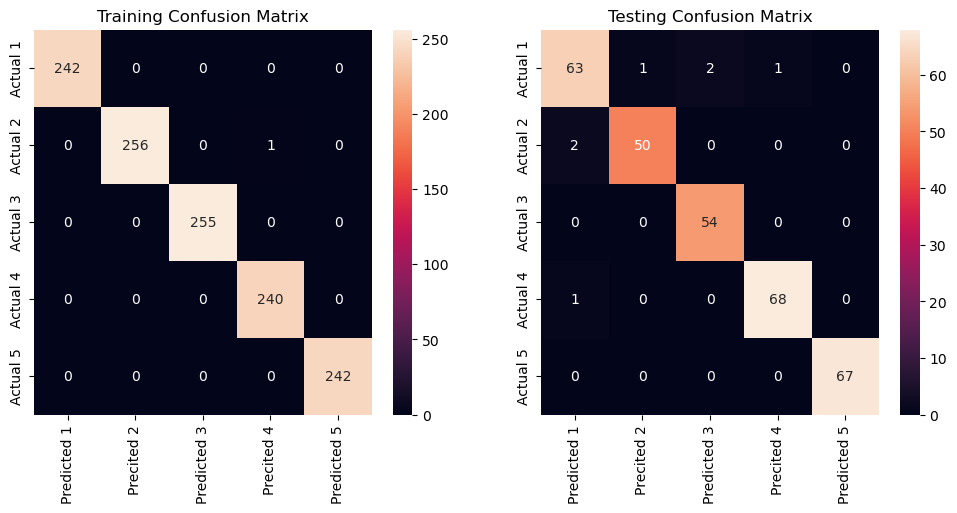

Model Number 45
Logistic Regression Tuned Model TFIDF


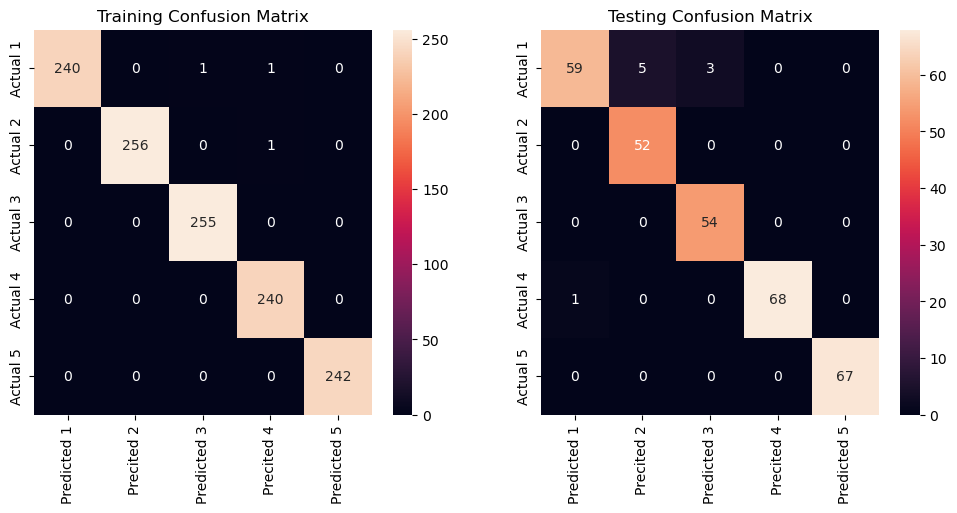

Model Number 43
SVM Tuned Model TFIDF


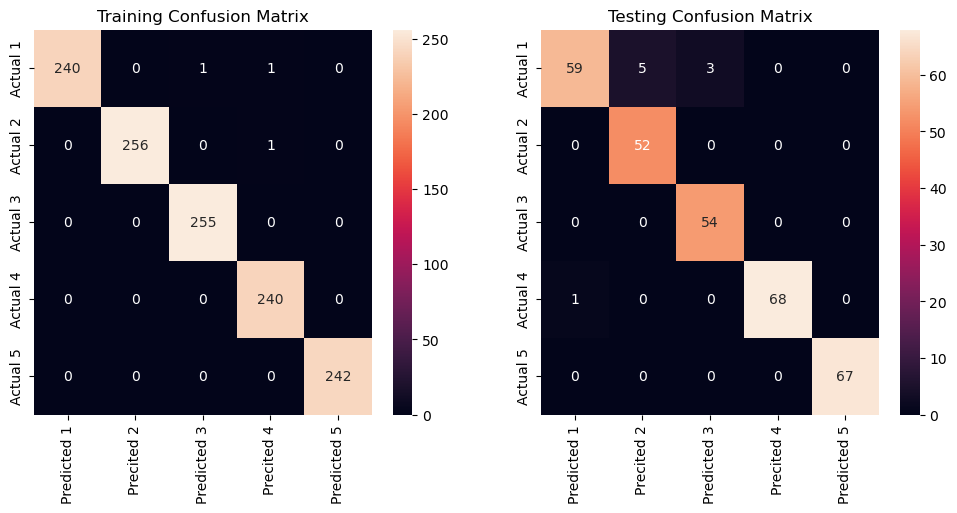

Model Number 51
Random Forest Tuned Model TFIDF


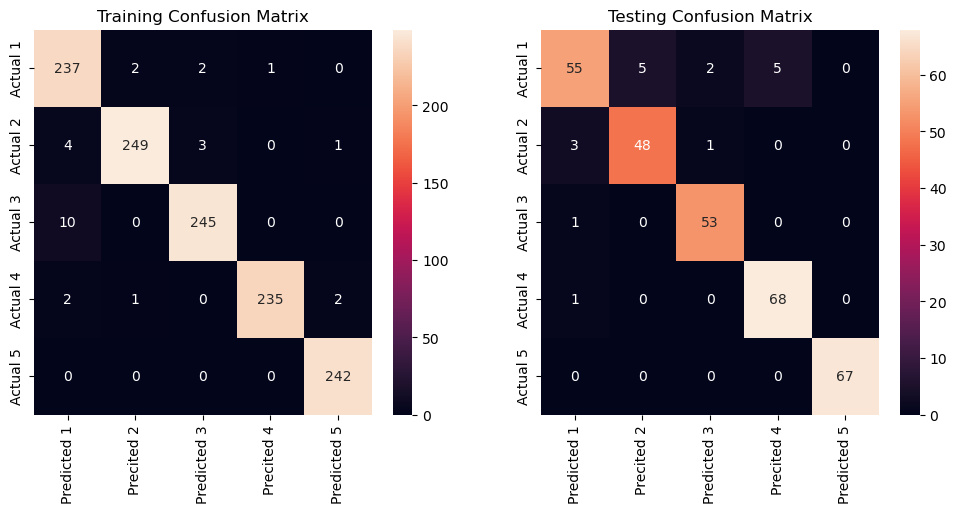

Model Number 44
Logistic Regression Initial Model TFIDF


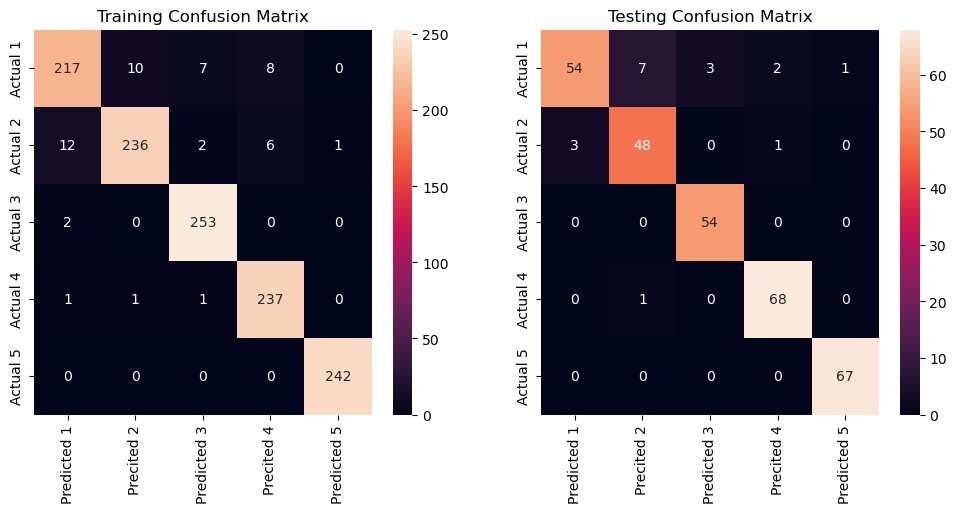

In [ ]:
# Creating the Confusion Matrices for the 5 best performing models

for i in model_index:  
    print("========================================")
    print("Model Number", i)
    print(All_Model_Results['Model Name'][i])
    print("========================================")
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.set_title('Training Confusion Matrix')
    sns.heatmap(conf_matrix[i][0], annot=True, fmt='.0f', ax=ax1)

    ax2.set_title('Testing Confusion Matrix')
    sns.heatmap(conf_matrix[i][1], annot=True, fmt='.0f', ax=ax2)

    plt.show()

# Final verdict on the classification model

The best model was a random forest model with TF IDF pre processing.

Got almost 98% of Accuracy, precision & recall for the testing data. The similar no. for training data was close to 100%. Seeing both the numbers, we can be confident that this is a good fit.

The testing confusion matrix for the same model shows just 7 misclassification.

Very happy with the results, model training & the overall approach taken to reach such good results.

# Augumentation

In [ ]:
data = pd.read_csv(f'{PROJECT_DIR}/data/processed/text_untreated.csv')
data.head()

,Accident Level,Potential Accident Level,Gender,Description,Country_Country_01,Country_Country_02,Country_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,...,Critical Risk_Projection,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco
0,1,4,0,While removing the drill rod of the Jumbo 08 f...,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,During the activation of a sodium sulphide pum...,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,In the sub-station MILPO located at level +170...,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,Being 9:45 am. approximately in the Nv. 1880 C...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,Approximately at 11:45 a.m. in circumstances t...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Accident Level                                           418 non-null    int64 
 1   Potential Accident Level                                 418 non-null    int64 
 2   Gender                                                   418 non-null    int64 
 3   Description                                              418 non-null    object
 4   Country_Country_01                                       418 non-null    int64 
 5   Country_Country_02                                       418 non-null    int64 
 6   Country_Country_03                                       418 non-null    int64 
 7   Local_Local_01                                           418 non-null    int64 
 8   Local_Local_02                          

In [ ]:
def countplot(df, col=None):
    count_plot = sns.countplot(df, x=col, stat='count') if col else sns.countplot(x=df, stat='count')
    for bars in count_plot.containers:
        for p in bars:
            count_plot.annotate(
                f'{(100 * p.get_height() / df.shape[0]) :.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center',
                va='bottom'
            )

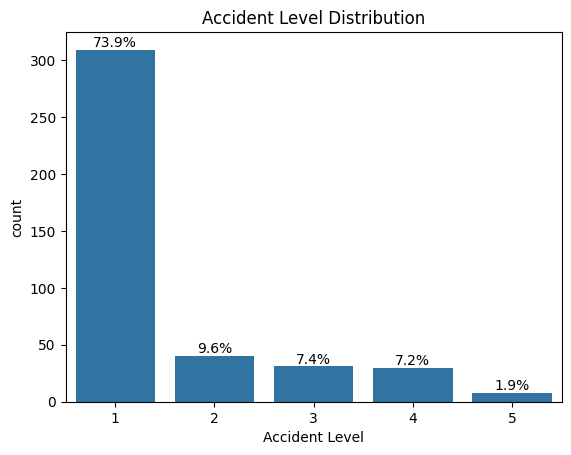

In [ ]:
countplot(data, 'Accident Level')
plt.title('Accident Level Distribution');

In [ ]:
from sklearn.model_selection import train_test_split

# Seperating target and predictor variables
X = data.drop(["Accident Level"], axis=1)
Y = data["Accident Level"]

# Train & test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

print('Shape of:')
print(f'Train set:', x_train.shape)
print(f'Test set:', x_test.shape)

Shape of:
Train set: (313, 57)
Test set: (105, 57)


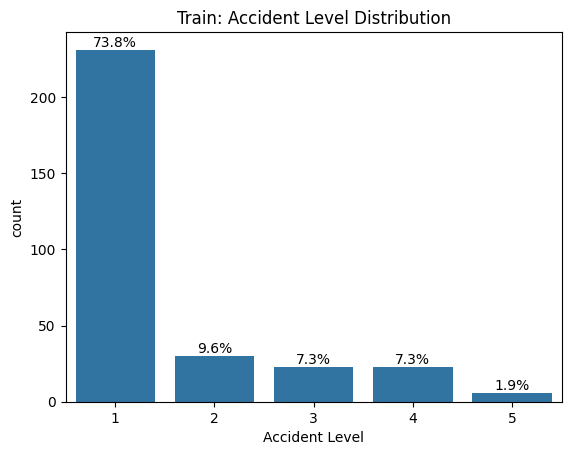

In [ ]:
countplot(y_train)
plt.title('Train: Accident Level Distribution');

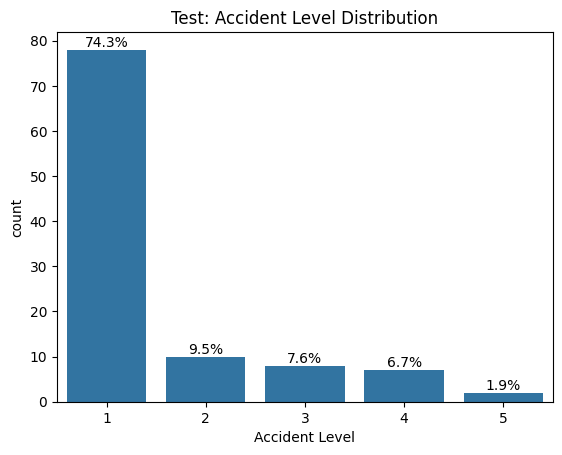

In [ ]:
countplot(y_test)
plt.title('Test: Accident Level Distribution');

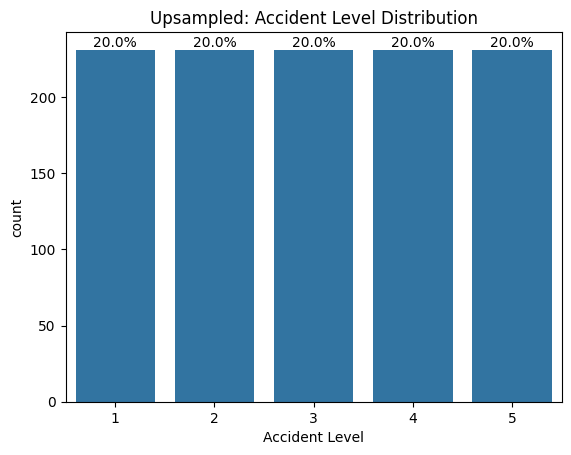

In [ ]:
from imblearn.over_sampling import SMOTE

# Separating numerical and text attributes in order to appy SMOTE up-sampling
x_train_us = x_train.drop('Description', axis=1)
descriptions = x_train['Description']

smote = SMOTE(k_neighbors=5, random_state=42)
x_train_us, y_train_us = smote.fit_resample(x_train_us, y_train)

countplot(y_train_us)
plt.title('Upsampled: Accident Level Distribution');


In [ ]:
# Resampling descriptions with NaN
descriptions = pd.concat([descriptions, pd.Series([np.nan] * (x_train_us.shape[0] - x_train.shape[0]), name='Description')], ignore_index=True)

# Concatenating resampled x_train and descriptions
x_train_us = pd.concat([x_train_us, descriptions], axis=1)

x_train_us.head()

,Potential Accident Level,Gender,Country_Country_01,Country_Country_02,Country_Country_03,Local_Local_01,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,...,Critical Risk_Projection of fragments,Critical Risk_Projection/Burning,Critical Risk_Projection/Choco,Critical Risk_Projection/Manual Tools,Critical Risk_Suspended Loads,Critical Risk_Traffic,Critical Risk_Vehicles and Mobile Equipment,Critical Risk_Venomous Animals,Critical Risk_remains of choco,Description
0,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,By manually moving a steel cabinet for disposa...
1,4,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Once the mooring of the faneles in the detonat...
2,4,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,When performing cleaning activity of the area ...
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The technician was doing the magnetometric sur...
4,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The operator cleaned with spatula spear throug...


In [ ]:
try:
  train_us = pd.read_csv(f'{PROJECT_DIR}/data/processed/augmented_train.csv')
except FileNotFoundError:
  train_us = pd.concat([x_train_us, y_train_us], axis=1)
  train_us.to_csv(f'{PROJECT_DIR}/data/processed/augmented_train.csv', index=False)
  pd.concat([x_test, y_test], axis=1).to_csv(f'{PROJECT_DIR}/data/processed/augmented_test.csv', index=False)

train_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Potential Accident Level                                 1155 non-null   int64 
 1   Gender                                                   1155 non-null   int64 
 2   Country_Country_01                                       1155 non-null   int64 
 3   Country_Country_02                                       1155 non-null   int64 
 4   Country_Country_03                                       1155 non-null   int64 
 5   Local_Local_01                                           1155 non-null   int64 
 6   Local_Local_02                                           1155 non-null   int64 
 7   Local_Local_03                                           1155 non-null   int64 
 8   Local_Local_04                        

In [ ]:
# Installing llama-cpp-python library
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.78 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 MB 61.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 194.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 153.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 194.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvi

In [ ]:
from llama_cpp import Llama

llm = Llama(
    model_path=f'{PROJECT_DIR}/models/llms/Meta-Llama-3-8B-Instruct-Q6_K.gguf',
    n_gpu_layers=-1,
    n_ctx=2048,
    seed=42
)

llama_model_loader: loaded meta data with 26 key-value pairs and 291 tensors from /content/drive/MyDrive/industrial-safety-chatbot/models/llms/Meta-Llama-3-8B-Instruct-Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = Meta-Llama-3-8B-Instruct
llama_model_loader: - kv   2:                          llama.block_count u32              = 32
llama_model_loader: - kv   3:                       llama.context_length u32              = 8192
llama_model_loader: - kv   4:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.attention.head_count u32              = 32


In [ ]:
train_df = pd.concat([x_train, y_train], axis=1)
train_us_copy = train_us.copy()

prompt = '''<|start_header_id|>system<|end_header_id|>
You are a helpful assistant designed to generate synthetic textual description of an industrial accident.<|eot_id|>
<|start_header_id|>user<|end_header_id|>
Consider the following descriptions of an industrial accident that represent a severity level of {accident_level} out of 6, with 6 being extremely severe.
1. {sample1}
2. {sample2}
3. {sample3}
Generate a new description of an industrial accident that conveys the same severity level.
The new description should be precise, match the tone and context of the given examples, and containing only essential information with no new line charachters.
Ensure that the generated text contains only the accident description without acknowledging these instructions or referring to your given task.<|eot_id|>
<|start_header_id|>assistant<|end_header_id|>
'''

def generate_synthetic_description(record):
    """
    Function to replace missing Description entries with synthetically generated text.
    """
    if type(record.loc['Description']) != float:
        return record

    # Selecting random Descriptions of the same Accident Level
    random.seed(record.name)
    accident_level = record.loc['Accident Level']
    subset = train_df[train_df['Accident Level'] == accident_level]
    samples = subset.iloc[random.sample(range(0, subset.shape[0]), 3)]['Description']

    # Synthetically generating a Description text using the LLM
    completion = llm(
        prompt=prompt.format(accident_level=accident_level, sample1=samples.iloc[0], sample2=samples.iloc[1], sample3=samples.iloc[2]),
        max_tokens=8192,
        top_p=0.75,
        temperature=0.6,
        repeat_penalty=1.2,
        stop=['<|eot_id|>'],
        echo=False,
        seed=42,
    )

    # Updating the record with the new Description
    train_us_copy.loc[record.name, 'Description'] = completion['choices'][0]['text']
    train_us_copy.to_csv(f'{PROJECT_DIR}/data/processed/augmented_train.csv', index=False)

    record.loc['Description'] = completion['choices'][0]['text']
    return record

In [ ]:
# Testing the function generate_synthetic_description
list(train_us.tail(5).progress_apply(generate_synthetic_description, axis=1)['Description'])


  0%|          | 0/5 [00:00<?, ?it/s]Llama.generate: prefix-match hit

llama_print_timings:        load time =     747.96 ms
llama_print_timings:      sample time =     251.90 ms /    92 runs   (    2.74 ms per token,   365.23 tokens per second)
llama_print_timings: prompt eval time =     549.59 ms /   471 tokens (    1.17 ms per token,   857.01 tokens per second)
llama_print_timings:        eval time =    3881.45 ms /    91 runs   (   42.65 ms per token,    23.44 tokens per second)
llama_print_timings:       total time =    4788.34 ms /   562 tokens
 40%|████      | 2/5 [00:04<00:07,  2.41s/it]Llama.generate: prefix-match hit

llama_print_timings:        load time =     747.96 ms
llama_print_timings:      sample time =     230.21 ms /   105 runs   (    2.19 ms per token,   456.10 tokens per second)
llama_print_timings: prompt eval time =     409.62 ms /   320 tokens (    1.28 ms per token,   781.20 tokens per second)
llama_print_timings:        eval time =    4838.95 ms /   104 runs 

["At approximately 14:15 hours on 04/05/2018, during routine maintenance operations in Cell E-421 of Sector A at the company's facility, a loud noise was heard followed by an electrical system malfunction. Immediately after, it became apparent that collaborator Rodriguez from department D-211 had suffered an electric shock and fell to the floor while attempting to access a nearby cabinet without authorization, resulting in severe injuries and subsequent loss of life.",
 'At 14:42 hours on 04/15/2022, during a routine maintenance operation in sector 3 of the chemical processing unit, an explosion occurred while attempting to purge residual gases from tank T-421. The blast was triggered by an unsecured valve that had been left open after previous work. As a result, operator Maria Rodriguez suffered severe burns on her face and arms as she attempted to flee the area. Her coworker, Juan Sanchez, received minor injuries when debris struck him in the leg.',
 "During the installation activity

In [ ]:
# Text up-sampling
train_us = train_us.progress_apply(generate_synthetic_description, axis=1)
train_us.info()

Streaming output truncated to the last 5000 lines.
 38%|███▊      | 442/1155 [09:02<47:32,  4.00s/it]Llama.generate: prefix-match hit

llama_print_timings:        load time =     747.96 ms
llama_print_timings:      sample time =     200.37 ms /    88 runs   (    2.28 ms per token,   439.19 tokens per second)
llama_print_timings: prompt eval time =     503.61 ms /   407 tokens (    1.24 ms per token,   808.16 tokens per second)
llama_print_timings:        eval time =    4462.77 ms /    87 runs   (   51.30 ms per token,    19.49 tokens per second)
llama_print_timings:       total time =    5254.21 ms /   494 tokens
 38%|███▊      | 443/1155 [09:07<52:08,  4.39s/it]Llama.generate: prefix-match hit

llama_print_timings:        load time =     747.96 ms
llama_print_timings:      sample time =     180.49 ms /    74 runs   (    2.44 ms per token,   409.99 tokens per second)
llama_print_timings: prompt eval time =     418.86 ms /   297 tokens (    1.41 ms per token,   709.06 tokens per second)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Potential Accident Level                                 1155 non-null   int64 
 1   Gender                                                   1155 non-null   int64 
 2   Country_Country_01                                       1155 non-null   int64 
 3   Country_Country_02                                       1155 non-null   int64 
 4   Country_Country_03                                       1155 non-null   int64 
 5   Local_Local_01                                           1155 non-null   int64 
 6   Local_Local_02                                           1155 non-null   int64 
 7   Local_Local_03                                           1155 non-null   int64 
 8   Local_Local_04                        

In [ ]:
# to generate a wordcloud
from wordcloud import WordCloud

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

from tensorflow.keras.layers import TextVectorization

tqdm.pandas()

# To Lemmatize using WordNet’s built-in morphy function
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize, RegexpTokenizer

import gensim
from gensim.models import Word2Vec

import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential

from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization
from keras.layers import Dropout, Flatten, SimpleRNN, LSTM, Input, Bidirectional, GlobalMaxPool1D, Embedding
from keras import optimizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import losses

# Tensor slicing
from tensorflow.data import Dataset

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from itertools import tee
from tensorflow import string

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.4f' % x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Google Colab setup
from google.colab import drive, userdata
drive.mount('/content/drive/')

# Defining the project directory
PROJECT_DIR = "/content/drive/My Drive/Capstone"

Mounted at /content/drive/


In [ ]:
# Reading the training dataset
acc_train_df = pd.read_csv(f'{PROJECT_DIR}/data/processed/augmented_train.csv', usecols=['Description', 'Accident Level'])

# Reading the test dataset
acc_test_df = pd.read_csv(f'{PROJECT_DIR}/data/processed/augmented_test.csv', usecols=['Description', 'Accident Level'])

In [ ]:
# Displaying the first 5 rows of the training dataset by taking only the description and accident level features
acc_train_df.head()

,Description,Accident Level
0,By manually moving a steel cabinet for disposa...,3
1,Once the mooring of the faneles in the detonat...,1
2,When performing cleaning activity of the area ...,3
3,The technician was doing the magnetometric sur...,1
4,The operator cleaned with spatula spear throug...,1


In [ ]:
# Displaying the first 5 rows of the test dataset by taking only the description and accident level features
acc_test_df.head()

,Description,Accident Level
0,On 02/03/17 during the soil sampling in the re...,1
1,During execution of drilling on the target - B...,3
2,"The operator was in the center (Demag IV), per...",1
3,The employee was transiting toward the cadmium...,1
4,"Being 12:20 hours Approximately, in circumstan...",2


In [ ]:
# Function to generate and display the word cloud
def display_wordcloud(series):
    # Generating wordcloud
    word_cloud = WordCloud(width = 1000, height = 600, background_color ='white', min_font_size = 10)
    word_cloud.generate(' '.join(list(series.apply(lambda x: x.lower()))))

    # plot the WordCloud image
    plt.figure(figsize=(6, 6), facecolor = None)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show();

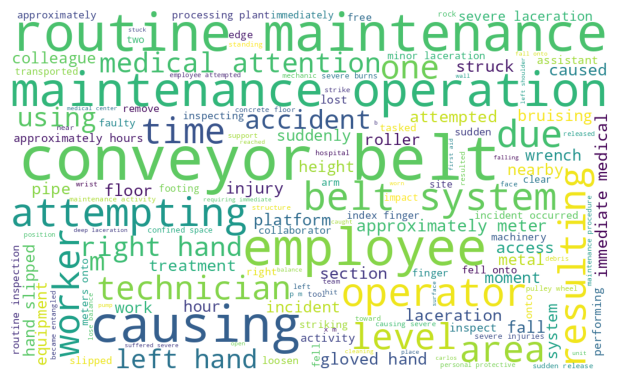

In [ ]:
# Creating word cloud for descriptiption from training dataset
display_wordcloud(acc_train_df['Description'])

In [ ]:
# Function to generate and display the word cloud
def display_wordcloud(series):
    # Generating wordcloud
    word_cloud = WordCloud(width = 1000, height = 600, background_color ='white', min_font_size = 10)
    word_cloud.generate(' '.join(list(series.apply(lambda x: x.lower()))))

    # plot the WordCloud image
    plt.figure(figsize=(6, 6), facecolor = None)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show();

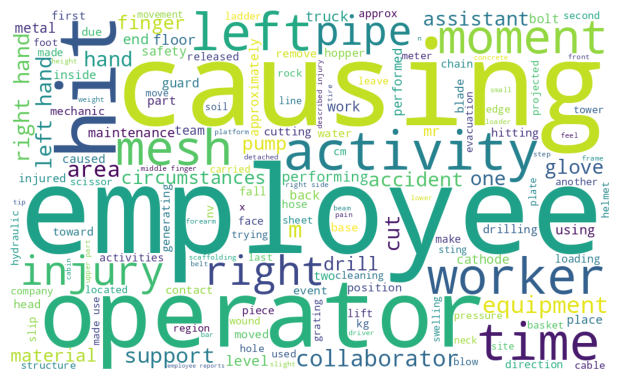

In [ ]:
# Creating word cloud for descriptiption from test dataset
display_wordcloud(acc_test_df['Description'])

In [ ]:
# Removing non-alphanumeric chars
acc_train_df['Description_T'] = acc_train_df['Description'].apply(lambda x: ''.join(re.sub('[^A-Za-z0-9]+', ' ', str(x))))
acc_test_df['Description_T'] = acc_test_df['Description'].apply(lambda x: ''.join(re.sub('[^A-Za-z0-9]+', ' ', str(x))))

In [ ]:
# Removing digits
acc_train_df['Description_T'] = acc_train_df['Description_T'].apply(lambda x: ''.join(re.sub(r'\d+',' ', str(x))))
acc_test_df['Description_T'] = acc_test_df['Description_T'].apply(lambda x: ''.join(re.sub(r'\d+',' ', str(x))))

In [ ]:
# Chaning to lowercase
acc_train_df['Description_T'] = acc_train_df['Description_T'].apply(lambda x: str(x).lower())
acc_test_df['Description_T'] = acc_test_df['Description_T'].apply(lambda x: str(x).lower())

In [ ]:
# Removing the leading and trailing spaces
acc_train_df['Description_T'] = acc_train_df['Description_T'].str.strip()
acc_test_df['Description_T'] = acc_test_df['Description_T'].str.strip()

In [ ]:
# Removing Stopword
acc_train_df['Description_T'] = acc_train_df['Description_T'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))
acc_test_df['Description_T'] = acc_test_df['Description_T'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

In [ ]:
# Removing Stopword
acc_train_df['Description_T'] = acc_train_df['Description_T'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))
acc_test_df['Description_T'] = acc_test_df['Description_T'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))

In [ ]:
acc_train_df.loc[0:10, ['Description', 'Description_T']]

,Description,Description_T
0,By manually moving a steel cabinet for disposa...,manually moving steel cabinet disposal help an...
1,Once the mooring of the faneles in the detonat...,mooring faneles detonating cord completed inju...
2,When performing cleaning activity of the area ...,performing cleaning activity area near tc grin...
3,The technician was doing the magnetometric sur...,technician magnetometric survey stepped thorn ...
4,The operator cleaned with spatula spear throug...,operator cleaned spatula spear one windows boi...
5,"On 02/25/2017 at 13:05 p.m., when assisting wi...",p assisting gps magnetometric collaborator gil...
6,"On 05/02/2017, at 10:40 p.m., when performing ...",p performing geological mapping activity geolo...
7,"In phase III of the concentrator plant, the ma...",phase iii concentrator plant maintenance perso...
8,"While preparing to mount polypropylene tubing,...",preparing mount polypropylene tubing employee ...
9,After the welder completed the welding work to...,welder completed welding work reinforce forms ...


In [ ]:
acc_test_df.loc[0:10, ['Description', 'Description_T']]

,Description,Description_T
0,On 02/03/17 during the soil sampling in the re...,soil sampling region sta employees rafael dani...
1,During execution of drilling on the target - B...,execution drilling target bolt brjcldd made co...
2,"The operator was in the center (Demag IV), per...",operator center demag iv performing maintenanc...
3,The employee was transiting toward the cadmium...,employee transiting toward cadmium factory nea...
4,"Being 12:20 hours Approximately, in circumstan...",hours approximately circumstances administrati...
5,"At Rp 050 of level 1620, in circumstances wher...",rp level circumstances workers company perform...
6,When observing the pulp overflow of the overfl...,observing pulp overflow overflow reception dra...
7,During the execution of the soil sampling task...,execution soil sampling task potions area arou...
8,In moments that the truck of transport of pers...,moments truck transport personnel company mcei...
9,Employee moved toward the structure of post 10...,employee moved toward structure post came step...


In [ ]:
# Lemmatize using WordNet’s built-in morphy function
lemmatizer = WordNetLemmatizer()

acc_train_df['Description_WL'] = acc_train_df.apply(lambda row: nltk.word_tokenize(row['Description_T']), axis=1)
acc_test_df['Description_WL'] = acc_test_df.apply(lambda row: nltk.word_tokenize(row['Description_T']), axis=1)

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return ' '.join(new_words)

acc_train_df['Description_WL'] = acc_train_df.apply(lambda x: lemmatize_list(x['Description_WL']), axis=1)
acc_test_df['Description_WL'] = acc_test_df.apply(lambda x: lemmatize_list(x['Description_WL']), axis=1)

In [ ]:
acc_train_df.loc[0:10, ['Description', 'Description_WL']]

,Description,Description_WL
0,By manually moving a steel cabinet for disposa...,manually move steel cabinet disposal help anot...
1,Once the mooring of the faneles in the detonat...,moor faneles detonate cord complete injure per...
2,When performing cleaning activity of the area ...,perform clean activity area near tc grind empl...
3,The technician was doing the magnetometric sur...,technician magnetometric survey step thorn rea...
4,The operator cleaned with spatula spear throug...,operator clean spatula spear one windows boile...
5,"On 02/25/2017 at 13:05 p.m., when assisting wi...",p assist gps magnetometric collaborator gilv n...
6,"On 05/02/2017, at 10:40 p.m., when performing ...",p perform geological map activity geologist ma...
7,"In phase III of the concentrator plant, the ma...",phase iii concentrator plant maintenance perso...
8,"While preparing to mount polypropylene tubing,...",prepare mount polypropylene tube employee pull...
9,After the welder completed the welding work to...,welder complete weld work reinforce form deepe...


In [ ]:
acc_test_df.loc[0:10, ['Description', 'Description_WL']]

,Description,Description_WL
0,On 02/03/17 during the soil sampling in the re...,soil sample region sta employees rafael danill...
1,During execution of drilling on the target - B...,execution drill target bolt brjcldd make compa...
2,"The operator was in the center (Demag IV), per...",operator center demag iv perform maintenance t...
3,The employee was transiting toward the cadmium...,employee transit toward cadmium factory near t...
4,"Being 12:20 hours Approximately, in circumstan...",hours approximately circumstances administrati...
5,"At Rp 050 of level 1620, in circumstances wher...",rp level circumstances workers company perform...
6,When observing the pulp overflow of the overfl...,observe pulp overflow overflow reception drawe...
7,During the execution of the soil sampling task...,execution soil sample task potions area around...
8,In moments that the truck of transport of pers...,moments truck transport personnel company mcei...
9,Employee moved toward the structure of post 10...,employee move toward structure post come step ...


In [ ]:
acc_train_df1 = acc_train_df.copy()
acc_test_df1 = acc_test_df.copy()

In [ ]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

In [ ]:
# Text normalization for Word2Vec
for df in [acc_train_df1, acc_test_df1]:
    df['tokens'] = (df["Description_WL"].apply(regexp.tokenize))

In [ ]:
acc_train_df1[['tokens', 'Accident Level']]

,tokens,Accident Level
0,"[manually, move, steel, cabinet, disposal, hel...",3
1,"[moor, faneles, detonate, cord, complete, inju...",1
2,"[perform, clean, activity, area, near, tc, gri...",3
3,"[technician, magnetometric, survey, step, thor...",1
4,"[operator, clean, spatula, spear, one, windows...",1
...,...,...
1150,"[approximately, hours, routine, maintenance, o...",5
1151,"[hours, routine, maintenance, operation, secto...",5
1152,"[installation, activity, meter, diameter, vent...",5
1153,"[maintenance, activity, conveyor, belt, feed, ...",5


In [ ]:
acc_test_df1[['tokens', 'Accident Level']]

,tokens,Accident Level
0,"[soil, sample, region, sta, employees, rafael,...",1
1,"[execution, drill, target, bolt, brjcldd, make...",3
2,"[operator, center, demag, iv, perform, mainten...",1
3,"[employee, transit, toward, cadmium, factory, ...",1
4,"[hours, approximately, circumstances, administ...",2
...,...,...
100,"[operator, descend, ladder, sailor, step, fall...",1
101,"[operator, feed, bag, big, bag, contain, scrap...",1
102,"[operator, will, manually, displace, zinc, she...",1
103,"[geological, reconnaissance, activity, farm, m...",1


In [ ]:
# Loading the pre-trained Word2Vec model
word2vec_path = PROJECT_DIR + '/models/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [ ]:
# Some useful functions for Word2Vec
def get_average_word2vec(tokens_list, vector, generate_missing = False, k = 300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis = 0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    return list(embeddings)

In [ ]:
# Word2Vec embedding
df_train_embed_W2V = get_word2vec_embeddings(word2vec, acc_train_df1['tokens'])
df_test_embed_W2V = get_word2vec_embeddings(word2vec, acc_test_df1['tokens'])

In [ ]:
df_train_W2V = scipy.sparse.csr_matrix(df_train_embed_W2V)
df_test_W2V = scipy.sparse.csr_matrix(df_test_embed_W2V)

In [ ]:
W2V_data_train = pd.DataFrame(df_train_W2V.todense(), columns=['Word2vec_'+str(i) for i in range(300)])
W2V_data_test = pd.DataFrame(df_test_W2V.todense(), columns=['Word2vec_'+str(i) for i in range(300)])

In [ ]:
W2V_data_train.head()

,Word2vec_0,Word2vec_1,Word2vec_2,Word2vec_3,Word2vec_4,Word2vec_5,Word2vec_6,Word2vec_7,Word2vec_8,Word2vec_9,...,Word2vec_290,Word2vec_291,Word2vec_292,Word2vec_293,Word2vec_294,Word2vec_295,Word2vec_296,Word2vec_297,Word2vec_298,Word2vec_299
0,-0.0389,0.0461,-0.0325,0.0007,-0.0464,-0.0107,0.1132,-0.1115,0.1225,0.0791,...,-0.0428,0.0826,-0.0809,-0.0216,-0.0228,0.0115,0.0100,-0.0240,-0.0811,-0.0210
1,-0.0248,0.0418,0.0107,-0.0078,-0.0484,-0.0242,0.0367,-0.0591,0.0857,0.0545,...,-0.0258,0.0576,-0.1260,0.0144,-0.0145,-0.0432,-0.1008,-0.0719,0.0223,-0.0430
2,-0.0357,0.0737,0.0062,0.0130,-0.0658,0.0373,-0.0165,-0.0890,0.0177,0.0333,...,-0.0326,0.0782,-0.0590,0.0027,0.0000,-0.0219,-0.1034,-0.0347,0.0073,-0.0010
3,0.0154,-0.0132,-0.0564,-0.0045,-0.1166,-0.0100,-0.0500,-0.1157,0.0740,0.0830,...,-0.0828,0.0362,-0.0542,0.0206,-0.0722,-0.0420,-0.1186,-0.0327,0.0566,0.0013
4,0.0405,0.0423,0.0511,-0.0112,-0.0855,0.0037,0.1200,-0.0999,0.1327,0.1117,...,-0.0617,0.0570,-0.0939,0.0174,-0.0134,-0.0347,0.0015,-0.0399,-0.0435,-0.0253


In [ ]:
W2V_data_test.head()

,Word2vec_0,Word2vec_1,Word2vec_2,Word2vec_3,Word2vec_4,Word2vec_5,Word2vec_6,Word2vec_7,Word2vec_8,Word2vec_9,...,Word2vec_290,Word2vec_291,Word2vec_292,Word2vec_293,Word2vec_294,Word2vec_295,Word2vec_296,Word2vec_297,Word2vec_298,Word2vec_299
0,-0.0224,0.0097,0.0366,0.0703,-0.0811,-0.0011,0.0285,-0.0886,0.0913,0.0646,...,-0.0071,0.0465,-0.0472,0.0495,-0.0082,-0.0025,-0.0031,-0.0278,-0.0715,-0.0265
1,-0.0134,0.0514,-0.0236,0.0503,-0.1160,-0.0236,0.0536,-0.1049,0.0687,0.0651,...,-0.0321,0.0561,-0.1170,0.0134,-0.0415,-0.0278,0.0023,-0.0106,-0.0183,-0.0489
2,0.0290,0.0119,0.0060,-0.0184,-0.1194,0.0163,0.0909,-0.1275,0.0398,0.0038,...,0.0057,0.1070,-0.0471,0.0509,0.0124,-0.0400,-0.0232,0.0038,-0.0473,-0.0219
3,-0.0129,0.0024,0.0409,0.1106,-0.0532,-0.0104,0.0598,-0.1222,0.0934,0.1503,...,-0.0272,-0.0610,-0.0059,0.0340,-0.0962,0.0453,-0.0034,0.0839,0.1053,-0.0908
4,0.0384,0.0092,0.0276,0.0308,-0.1075,-0.0074,0.0733,-0.1233,0.0524,0.0138,...,-0.0511,0.0617,-0.0995,0.0490,-0.0089,-0.0495,0.0448,-0.0103,-0.0655,0.0057


In [ ]:
W2V_data_train.shape

(1155, 300)

In [ ]:
W2V_data_test.shape

(105, 300)

In [ ]:
final_W2V_train = acc_train_df1[['Accident Level']].join(W2V_data_train.reset_index(drop=True))

In [ ]:
final_W2V_train.head()

,Accident Level,Word2vec_0,Word2vec_1,Word2vec_2,Word2vec_3,Word2vec_4,Word2vec_5,Word2vec_6,Word2vec_7,Word2vec_8,...,Word2vec_290,Word2vec_291,Word2vec_292,Word2vec_293,Word2vec_294,Word2vec_295,Word2vec_296,Word2vec_297,Word2vec_298,Word2vec_299
0,3,-0.0389,0.0461,-0.0325,0.0007,-0.0464,-0.0107,0.1132,-0.1115,0.1225,...,-0.0428,0.0826,-0.0809,-0.0216,-0.0228,0.0115,0.0100,-0.0240,-0.0811,-0.0210
1,1,-0.0248,0.0418,0.0107,-0.0078,-0.0484,-0.0242,0.0367,-0.0591,0.0857,...,-0.0258,0.0576,-0.1260,0.0144,-0.0145,-0.0432,-0.1008,-0.0719,0.0223,-0.0430
2,3,-0.0357,0.0737,0.0062,0.0130,-0.0658,0.0373,-0.0165,-0.0890,0.0177,...,-0.0326,0.0782,-0.0590,0.0027,0.0000,-0.0219,-0.1034,-0.0347,0.0073,-0.0010
3,1,0.0154,-0.0132,-0.0564,-0.0045,-0.1166,-0.0100,-0.0500,-0.1157,0.0740,...,-0.0828,0.0362,-0.0542,0.0206,-0.0722,-0.0420,-0.1186,-0.0327,0.0566,0.0013
4,1,0.0405,0.0423,0.0511,-0.0112,-0.0855,0.0037,0.1200,-0.0999,0.1327,...,-0.0617,0.0570,-0.0939,0.0174,-0.0134,-0.0347,0.0015,-0.0399,-0.0435,-0.0253


In [ ]:
final_W2V_test = acc_test_df1[['Accident Level']].join(W2V_data_test.reset_index(drop=True))

In [ ]:
final_W2V_test.head()

,Accident Level,Word2vec_0,Word2vec_1,Word2vec_2,Word2vec_3,Word2vec_4,Word2vec_5,Word2vec_6,Word2vec_7,Word2vec_8,...,Word2vec_290,Word2vec_291,Word2vec_292,Word2vec_293,Word2vec_294,Word2vec_295,Word2vec_296,Word2vec_297,Word2vec_298,Word2vec_299
0,1,-0.0224,0.0097,0.0366,0.0703,-0.0811,-0.0011,0.0285,-0.0886,0.0913,...,-0.0071,0.0465,-0.0472,0.0495,-0.0082,-0.0025,-0.0031,-0.0278,-0.0715,-0.0265
1,3,-0.0134,0.0514,-0.0236,0.0503,-0.1160,-0.0236,0.0536,-0.1049,0.0687,...,-0.0321,0.0561,-0.1170,0.0134,-0.0415,-0.0278,0.0023,-0.0106,-0.0183,-0.0489
2,1,0.0290,0.0119,0.0060,-0.0184,-0.1194,0.0163,0.0909,-0.1275,0.0398,...,0.0057,0.1070,-0.0471,0.0509,0.0124,-0.0400,-0.0232,0.0038,-0.0473,-0.0219
3,1,-0.0129,0.0024,0.0409,0.1106,-0.0532,-0.0104,0.0598,-0.1222,0.0934,...,-0.0272,-0.0610,-0.0059,0.0340,-0.0962,0.0453,-0.0034,0.0839,0.1053,-0.0908
4,2,0.0384,0.0092,0.0276,0.0308,-0.1075,-0.0074,0.0733,-0.1233,0.0524,...,-0.0511,0.0617,-0.0995,0.0490,-0.0089,-0.0495,0.0448,-0.0103,-0.0655,0.0057


In [ ]:
final_W2V_train.to_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_word2vec_train.csv', index=False, header=True)

In [ ]:
final_W2V_test.to_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_word2vec_test.csv', index=False, header=True)

In [ ]:
final_tfidf_train = pd.DataFrame()

tfidf = TfidfVectorizer(max_features=300, stop_words='english', use_idf=True)
X = tfidf.fit_transform(acc_train_df1['Description_WL']).toarray()
tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in tfidf.get_feature_names_out()])
final_tfidf_train = pd.concat([final_tfidf_train.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

In [ ]:
final_tfidf_train.head()

,TFIDF_access,TFIDF_accident,TFIDF_accidentally,TFIDF_activate,TFIDF_activity,TFIDF_adjacent,TFIDF_adjust,TFIDF_affect,TFIDF_aid,TFIDF_air,...,TFIDF_wall,TFIDF_wear,TFIDF_weight,TFIDF_wheel,TFIDF_wire,TFIDF_work,TFIDF_worker,TFIDF_workers,TFIDF_wrench,TFIDF_wrist
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.4659,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.1238,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.1190,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.1678,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
final_tfidf_train.shape

(1155, 300)

In [ ]:
final_tfidf_train = acc_train_df1[['Accident Level']].join(final_tfidf_train.reset_index(drop=True))

In [ ]:
final_tfidf_train.shape

(1155, 301)

In [ ]:
final_tfidf_train.head()

,Accident Level,TFIDF_access,TFIDF_accident,TFIDF_accidentally,TFIDF_activate,TFIDF_activity,TFIDF_adjacent,TFIDF_adjust,TFIDF_affect,TFIDF_aid,...,TFIDF_wall,TFIDF_wear,TFIDF_weight,TFIDF_wheel,TFIDF_wire,TFIDF_work,TFIDF_worker,TFIDF_workers,TFIDF_wrench,TFIDF_wrist
0,3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.4659,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1,0.0000,0.1238,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.1190,0.0000,0.0000,0.0000,0.0000
2,3,0.0000,0.0000,0.0000,0.0000,0.1678,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
final_tfidf_train.to_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_tfidf_train.csv', index=False, header=True)

In [ ]:
final_tfidf_test = pd.DataFrame()
X = tfidf.transform(acc_test_df1['Description_WL']).toarray()
tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in tfidf.get_feature_names_out()])
final_tfidf_test = pd.concat([final_tfidf_test.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

In [ ]:
final_tfidf_test.head()

,TFIDF_access,TFIDF_accident,TFIDF_accidentally,TFIDF_activate,TFIDF_activity,TFIDF_adjacent,TFIDF_adjust,TFIDF_affect,TFIDF_aid,TFIDF_air,...,TFIDF_wall,TFIDF_wear,TFIDF_weight,TFIDF_wheel,TFIDF_wire,TFIDF_work,TFIDF_worker,TFIDF_workers,TFIDF_wrench,TFIDF_wrist
0,0.0000,0.0000,0.0000,0.0000,0.1719,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
final_tfidf_test.shape

(105, 300)

In [ ]:
final_tfidf_test = acc_test_df1[['Accident Level']].join(final_tfidf_test.reset_index(drop=True))

In [ ]:
final_tfidf_test.shape

(105, 301)

In [ ]:
final_tfidf_test.head()

,Accident Level,TFIDF_access,TFIDF_accident,TFIDF_accidentally,TFIDF_activate,TFIDF_activity,TFIDF_adjacent,TFIDF_adjust,TFIDF_affect,TFIDF_aid,...,TFIDF_wall,TFIDF_wear,TFIDF_weight,TFIDF_wheel,TFIDF_wire,TFIDF_work,TFIDF_worker,TFIDF_workers,TFIDF_wrench,TFIDF_wrist
0,1,0.0000,0.0000,0.0000,0.0000,0.1719,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
final_tfidf_test.to_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_tfidf_test.csv', index=False, header=True)

In [ ]:
# Load the GloVe model
glove_input_file = PROJECT_DIR + '/models/glove.6B.300d/glove.6B.300d.txt'
word2vec_output_file = PROJECT_DIR + '/models/glove.6B.300d/glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

# load the Stanford GloVe model
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size = 300

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
final_glove_train = pd.DataFrame(acc_train_df1['Description_WL'].apply(average_vectorizer_GloVe).tolist(),
                        columns=['glove_'+str(i) for i in range(vec_size)])

final_glove_test = pd.DataFrame(acc_test_df1['Description_WL'].apply(average_vectorizer_GloVe).tolist(),
                        columns=['glove_'+str(i) for i in range(vec_size)])

In [ ]:
final_glove_train.head()

,glove_0,glove_1,glove_2,glove_3,glove_4,glove_5,glove_6,glove_7,glove_8,glove_9,...,glove_290,glove_291,glove_292,glove_293,glove_294,glove_295,glove_296,glove_297,glove_298,glove_299
0,-0.0112,0.1478,-0.0339,-0.1440,-0.0103,-0.1723,0.0665,-0.0846,-0.0009,-1.3143,...,0.1003,-0.1706,-0.0336,-0.1485,0.1552,0.3338,-0.0377,-0.3243,-0.2088,-0.0780
1,-0.1327,0.1218,-0.2300,-0.1623,-0.1905,0.0913,0.0118,0.1863,0.0093,-0.8427,...,0.1194,0.0496,-0.0880,-0.1574,0.2106,0.1262,0.0740,-0.0681,0.0012,-0.0851
2,-0.2985,0.0759,-0.2530,-0.2254,-0.2190,0.0719,0.0370,0.2955,-0.0801,-1.0238,...,0.1601,-0.0130,-0.0746,-0.1123,0.2292,0.1895,0.1979,-0.1890,-0.0067,-0.1381
3,0.0833,0.0601,0.0123,-0.0936,-0.0292,-0.1802,0.0468,-0.1372,0.0412,-1.0816,...,-0.0367,-0.1152,0.0129,-0.0490,0.1352,0.0447,0.0115,-0.1132,0.0270,-0.0229
4,0.0145,-0.0037,-0.0617,-0.3436,-0.0800,0.0215,-0.0697,-0.0161,0.0551,-1.0276,...,-0.1292,0.0085,-0.0340,-0.0583,0.1955,0.1729,-0.0682,-0.2019,-0.0767,0.0684


In [ ]:
final_glove_test.head()

,glove_0,glove_1,glove_2,glove_3,glove_4,glove_5,glove_6,glove_7,glove_8,glove_9,...,glove_290,glove_291,glove_292,glove_293,glove_294,glove_295,glove_296,glove_297,glove_298,glove_299
0,-0.1225,0.2628,-0.1210,-0.0900,0.0157,-0.0916,-0.1634,-0.0394,0.0329,-1.1397,...,0.0391,-0.1903,-0.0250,-0.0356,0.0454,0.0310,0.0488,-0.0984,-0.0776,0.0434
1,0.0367,0.0830,-0.0845,-0.2178,-0.0616,-0.1503,0.0576,0.0183,0.0322,-1.1121,...,-0.0208,-0.0836,0.0038,-0.0011,0.1042,0.1977,-0.0270,-0.2055,-0.0254,-0.0802
2,-0.0886,0.0048,-0.0446,-0.2900,-0.1407,-0.0796,0.0940,0.0656,-0.0844,-1.0677,...,-0.0054,-0.0528,-0.0701,-0.2004,0.1913,0.2865,-0.1379,-0.1796,-0.1326,0.0978
3,-0.0846,0.1444,-0.0628,-0.1677,-0.0715,-0.1907,0.0936,0.0143,0.1373,-1.1036,...,-0.2543,-0.0263,0.0247,0.1035,0.1477,0.1978,0.0604,-0.2234,-0.0187,0.0661
4,-0.0577,0.0309,-0.1029,-0.2436,0.0403,-0.0438,-0.0241,-0.0333,0.0768,-1.1261,...,0.0750,-0.1024,0.0477,-0.0037,0.0449,0.1167,0.0016,-0.1059,0.0221,-0.1485


In [ ]:
final_glove_train = acc_train_df1[['Accident Level']].join(final_glove_train.reset_index(drop=True))

In [ ]:
final_glove_train.head()

,Accident Level,glove_0,glove_1,glove_2,glove_3,glove_4,glove_5,glove_6,glove_7,glove_8,...,glove_290,glove_291,glove_292,glove_293,glove_294,glove_295,glove_296,glove_297,glove_298,glove_299
0,3,-0.0112,0.1478,-0.0339,-0.1440,-0.0103,-0.1723,0.0665,-0.0846,-0.0009,...,0.1003,-0.1706,-0.0336,-0.1485,0.1552,0.3338,-0.0377,-0.3243,-0.2088,-0.0780
1,1,-0.1327,0.1218,-0.2300,-0.1623,-0.1905,0.0913,0.0118,0.1863,0.0093,...,0.1194,0.0496,-0.0880,-0.1574,0.2106,0.1262,0.0740,-0.0681,0.0012,-0.0851
2,3,-0.2985,0.0759,-0.2530,-0.2254,-0.2190,0.0719,0.0370,0.2955,-0.0801,...,0.1601,-0.0130,-0.0746,-0.1123,0.2292,0.1895,0.1979,-0.1890,-0.0067,-0.1381
3,1,0.0833,0.0601,0.0123,-0.0936,-0.0292,-0.1802,0.0468,-0.1372,0.0412,...,-0.0367,-0.1152,0.0129,-0.0490,0.1352,0.0447,0.0115,-0.1132,0.0270,-0.0229
4,1,0.0145,-0.0037,-0.0617,-0.3436,-0.0800,0.0215,-0.0697,-0.0161,0.0551,...,-0.1292,0.0085,-0.0340,-0.0583,0.1955,0.1729,-0.0682,-0.2019,-0.0767,0.0684


In [ ]:
final_glove_test.shape

(105, 300)

In [ ]:
final_glove_test= acc_test_df1[['Accident Level']].join(final_glove_test.reset_index(drop=True))

In [ ]:
final_glove_test.head()

,Accident Level,glove_0,glove_1,glove_2,glove_3,glove_4,glove_5,glove_6,glove_7,glove_8,...,glove_290,glove_291,glove_292,glove_293,glove_294,glove_295,glove_296,glove_297,glove_298,glove_299
0,1,-0.1225,0.2628,-0.1210,-0.0900,0.0157,-0.0916,-0.1634,-0.0394,0.0329,...,0.0391,-0.1903,-0.0250,-0.0356,0.0454,0.0310,0.0488,-0.0984,-0.0776,0.0434
1,3,0.0367,0.0830,-0.0845,-0.2178,-0.0616,-0.1503,0.0576,0.0183,0.0322,...,-0.0208,-0.0836,0.0038,-0.0011,0.1042,0.1977,-0.0270,-0.2055,-0.0254,-0.0802
2,1,-0.0886,0.0048,-0.0446,-0.2900,-0.1407,-0.0796,0.0940,0.0656,-0.0844,...,-0.0054,-0.0528,-0.0701,-0.2004,0.1913,0.2865,-0.1379,-0.1796,-0.1326,0.0978
3,1,-0.0846,0.1444,-0.0628,-0.1677,-0.0715,-0.1907,0.0936,0.0143,0.1373,...,-0.2543,-0.0263,0.0247,0.1035,0.1477,0.1978,0.0604,-0.2234,-0.0187,0.0661
4,2,-0.0577,0.0309,-0.1029,-0.2436,0.0403,-0.0438,-0.0241,-0.0333,0.0768,...,0.0750,-0.1024,0.0477,-0.0037,0.0449,0.1167,0.0016,-0.1059,0.0221,-0.1485


In [ ]:
final_glove_test.shape

(105, 301)

In [ ]:
final_glove_train.to_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_glove_train.csv', index=False,header=True)

In [ ]:
final_glove_test.to_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_glove_test.csv', index=False,header=True)

In [ ]:
!pip install wordcloud
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
# to generate a wordcloud
from wordcloud import WordCloud

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

from tensorflow.keras.layers import TextVectorization

tqdm.pandas()

# To Lemmatize using WordNet’s built-in morphy function
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize, RegexpTokenizer

import gensim
from gensim.models import Word2Vec

import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential

from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization
from keras.layers import Dropout, Flatten, SimpleRNN, LSTM, Input, Bidirectional, GlobalMaxPool1D, Embedding
from keras import optimizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import losses

# Tensor slicing
from tensorflow.data import Dataset

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from itertools import tee
from tensorflow import string

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.4f' % x)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Google Colab setup
from google.colab import drive, userdata
drive.mount('/content/drive/')

# Defining the project directory
PROJECT_DIR = "/content/drive/My Drive/Capstone"

Mounted at /content/drive/


In [ ]:
# Reading the DataSet and exporting that in the DataFrame
safety_df_word2vec_train = pd.read_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_word2vec_train.csv')
safety_df_word2vec_test = pd.read_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_word2vec_test.csv')

safety_df_tfidf_train = pd.read_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_tfidf_train.csv')
safety_df_tfidf_test = pd.read_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_tfidf_test.csv')

safety_df_glove_train = pd.read_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_glove_train.csv')
safety_df_glove_test = pd.read_csv(PROJECT_DIR + '/data/processed/nlp_chatbot_glove_test.csv')

In [ ]:
# Function to split the dataset

def split_df(df_name_train, df_name_test):
    # Splitting the data
    X_train = df_name_train.drop(columns='Accident Level')
    y_train = df_name_train['Accident Level']

    X_test = df_name_test.drop(columns='Accident Level')
    y_test = df_name_test['Accident Level']

    # Applying label_encoding
    le = LabelEncoder()
    y_train_le = le.fit_transform(y_train)
    y_test_le = le.transform(y_test)

    # Applying one hot encoding
    y_train_ohe = to_categorical(y_train_le)
    y_test_ohe = to_categorical(y_test_le)

    # Displaying the shape of dataframe after split
    print("The shape for data frame X_train")
    print(X_train.shape)
    print("The shape for data frame X_test")
    print(X_test.shape)
    print("The shape for data frame y_train")
    print(y_train.shape)
    print("The shape for data frame y_test")
    print(y_test.shape)
    return X_train, y_train_le, y_train_ohe, X_test, y_test_le, y_test_ohe

In [ ]:
# Designing the dataframe to document the model performance

NN_Model_Results = pd.DataFrame(columns=['Model Name','Training Loss', 'Testing Loss',
                                          'Training Accuracy', 'Testing Accuracy'])

In [ ]:
# Function to generate the model performance and the classification report

def Generate_Classification_Report(model_name, model_print_name, X_train, y_train, X_test, y_test):

    # Predicting the model on test data
    y_train_pred = model_name.predict(X_train)
    y_test_pred = model_name.predict(X_test)

    # Getting the predicted output in a list
    y_train_pred_final = []
    for i in y_train_pred:
        y_train_pred_final.append(np.argmax(i))

    y_test_pred_final = []
    for i in y_test_pred:
        y_test_pred_final.append(np.argmax(i))

    scores_train = model_name.evaluate(X_train, y_train, verbose=0)
    train_loss = scores_train[0]
    train_acc = scores_train[1]

    scores_test = model_name.evaluate(X_test, y_test, verbose=0)
    test_loss = scores_test[0]
    test_acc = scores_test[1]

    # Adding the model performance in the table for the final evaluation
    NN_Model_Results.loc[len(NN_Model_Results.index)] = [model_print_name, train_loss, test_loss, train_acc,test_acc]

    return y_train_pred_final, y_test_pred_final

In [ ]:
# Function to generate the confusion matrix for the models

def Generate_Acc_Loss_Plot(acc_level_model_train):
    EPOCH = 100
    # Plotting Training Accuracy and Validation Accuracy
    acc_train = acc_level_model_train.history['accuracy']
    acc_val = acc_level_model_train.history['val_accuracy']
    epochs = range(1, EPOCH + 1)
    plt.plot(epochs, acc_train, 'orange', label = 'Training Accuracy')
    plt.plot(epochs, acc_val, 'blue', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plotting Training Loss and Validation Loss
    loss_train = acc_level_model_train.history['loss']
    loss_val = acc_level_model_train.history['val_loss']
    epochs = range(1, EPOCH + 1)
    plt.plot(epochs, loss_train, 'orange', label = 'Training Loss')
    plt.plot(epochs, loss_val, 'blue', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
model_num = 0
# Dictionary to store the classification report
class_matrix = {}
# Dictionary to store the model history
acc_loss_plot = {}
EPOCH = 100

# We are going to use the TF-IDF dataset with ANN models

X_train_ann, y_train_le, y_train_ann, X_test_ann, y_test_le, y_test_ann = split_df(safety_df_tfidf_train, safety_df_tfidf_test)

acc_level_model = Sequential()

# Adding the Input Layer
acc_level_model.add(Dense(256, kernel_initializer='he_uniform', input_dim = X_train_ann.shape[1], activation='tanh'))

# Adding the Hidden Layers
acc_level_model.add(Dense(64, kernel_initializer='he_uniform', activation='tanh'))
acc_level_model.add(Dense(64, kernel_initializer='he_uniform', activation='tanh'))
acc_level_model.add(Dense(32, kernel_initializer='he_uniform', activation='tanh'))

# Adding the Output Layers
acc_level_model.add(Dense(y_train_ann.shape[1], activation='softmax'))

#Creating a SGD Optimizer object
sgd_optimizer = optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)

# Compiling the network
acc_level_model.compile(loss=losses.categorical_crossentropy, optimizer=sgd_optimizer, metrics=['accuracy'])

acc_level_model.summary()

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=0.00001, verbose=0, model='auto'),
    ModelCheckpoint(PROJECT_DIR + '/models/check', monitor='val_loss', save_best_only=True, initial_value_threshold=1, verbose=0)
]

# Training the model with the training data, callbacks and other parameters
acc_level_model_train = acc_level_model.fit(X_train_ann, y_train_ann, validation_split = 0.2,
                                                  epochs = EPOCH, validation_data=(X_test_ann, y_test_ann),
                                                  batch_size = 128, verbose=0, callbacks = callbacks)


# Model Identifier to identify the model performance
model_identifier = "ANN Model Initial (TF-IDF)"

# Calling the function to generate classification report
class_matrix[model_num] = Generate_Classification_Report(acc_level_model, model_identifier, X_train_ann, y_train_ann, X_test_ann, y_test_ann)
# Calling the function to generate the confusion matrix
acc_loss_plot[model_num] = acc_level_model_train

The shape for data frame X_train
(1155, 300)
The shape for data frame X_test
(105, 300)
The shape for data frame y_train
(1155,)
The shape for data frame y_test
(105,)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               77056     
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                                 
Total params: 99909 (390.27 KB)
Trainable params: 99909 (390.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
4/4 [=============

In [ ]:
# Creating classification report for training data
print(classification_report(y_train_le, class_matrix[model_num][0]))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       231
           1       0.87      0.81      0.84       231
           2       0.87      0.75      0.81       231
           3       0.89      0.91      0.90       231
           4       0.98      0.99      0.99       231

    accuracy                           0.89      1155
   macro avg       0.89      0.89      0.88      1155
weighted avg       0.89      0.89      0.88      1155



In [ ]:
# Creating classification report for test data
print(classification_report(y_test_le, class_matrix[model_num][1]))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        78
           1       0.12      0.10      0.11        10
           2       0.33      0.12      0.18         8
           3       0.50      0.29      0.36         7
           4       0.00      0.00      0.00         2

    accuracy                           0.72       105
   macro avg       0.35      0.29      0.30       105
weighted avg       0.66      0.72      0.69       105



In [ ]:
NN_Model_Results

,Model Name,Training Loss,Testing Loss,Training Accuracy,Testing Accuracy
0,ANN Model Initial (TF-IDF),0.3496,0.8695,0.8857,0.7238


In [ ]:
model_num = model_num + 1

In [ ]:
acc_level_model_1 = Sequential()

# In earlier model we used 'tanh' activation function. In this model we will use 'relu' as the activation function

# Adding the Input Layer
acc_level_model_1.add(Dense(256, kernel_initializer='he_uniform', input_dim = X_train_ann.shape[1], activation='relu'))

# Adding the Hidden Layers
# Adding additional Hidden Layers compared to the previous model
acc_level_model_1.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
acc_level_model_1.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
acc_level_model_1.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
acc_level_model_1.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))

# Adding dropout for the better performance
acc_level_model_1.add(Dropout(0.5))

# Adding batch normalization for better performance
acc_level_model_1.add(BatchNormalization())

# Adding the Output Layers
acc_level_model_1.add(Dense(y_train_ann.shape[1], activation='softmax'))

# Creating an adam optimizer. In the previous model, we used sgd.
adam = optimizers.Adam(lr=1e-3)

# Compiling the network
acc_level_model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

acc_level_model_1.summary()

# Training the model with the training dataand other parameters
acc_level_model_train_1 = acc_level_model_1.fit(X_train_ann, y_train_ann, validation_split = 0.2,
                                                      epochs = EPOCH, validation_data=(X_test_ann, y_test_ann),
                                                      batch_size = 128, verbose=0)

# Model Identifier to identify the model performance
model_identifier = "ANN Model Modified (TF-IDF)"

# Calling the function to generate classification report
class_matrix[model_num] = Generate_Classification_Report(acc_level_model_1, model_identifier, X_train_ann, y_train_ann, X_test_ann, y_test_ann)
# Calling the function to generate the confusion matrix
acc_loss_plot[model_num] = acc_level_model_train_1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               77056     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (Batch  (None, 32)               

In [ ]:
# Creating classification report for training data
print(classification_report(y_train_le, class_matrix[model_num][0]))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       231
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       231
           3       1.00      0.99      1.00       231
           4       1.00      1.00      1.00       231

    accuracy                           1.00      1155
   macro avg       1.00      1.00      1.00      1155
weighted avg       1.00      1.00      1.00      1155



In [ ]:
# Creating classification report for test data
print(classification_report(y_test_le, class_matrix[model_num][1]))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        78
           1       0.27      0.30      0.29        10
           2       0.25      0.12      0.17         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.69       105
   macro avg       0.26      0.26      0.25       105
weighted avg       0.61      0.69      0.64       105



In [ ]:
NN_Model_Results

,Model Name,Training Loss,Testing Loss,Training Accuracy,Testing Accuracy
0,ANN Model Initial (TF-IDF),0.3496,0.8695,0.8857,0.7238
1,ANN Model Modified (TF-IDF),0.0104,1.6336,0.9974,0.6857


In [ ]:
model_num = model_num + 1

In [ ]:
# We are going to use the Word2vec and GLOVE datasets with RNN model

X_train_w2v, y_train_le, y_train_w2v, X_test_w2v, y_test_le, y_test_w2v = split_df(safety_df_word2vec_train, safety_df_word2vec_test)

# Define RNN model architecture
acc_level_RNN_model = Sequential()
# Adding the Input Layer
acc_level_RNN_model.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=(X_train_w2v.shape[1],1)))

# Adding the second RNN layer and some Dropout regularization
acc_level_RNN_model.add(SimpleRNN(64, activation='tanh', return_sequences=True))
acc_level_RNN_model.add(Dropout(0.2))

# Adding the third RNN layer and some Dropout regularization
acc_level_RNN_model.add(SimpleRNN(64, activation='tanh', return_sequences=True))
acc_level_RNN_model.add(Dropout(0.2))

# Adding the fourth RNN layer and some Dropout regularization
acc_level_RNN_model.add(SimpleRNN(32, activation='tanh'))
acc_level_RNN_model.add(Dropout(0.5))

#Adding the output layer
acc_level_RNN_model.add(Dense(y_train_w2v.shape[1], activation='softmax'))

# Creating an adam optimizer
adam = optimizers.Adam(lr=1e-3)

#Compile the RNN
acc_level_RNN_model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

acc_level_RNN_model.summary()

# Training the model with the training data, callbacks and other parameters
acc_level_RNN_model_train = acc_level_RNN_model.fit(X_train_w2v, y_train_w2v, validation_split = 0.2,
                                                  epochs = EPOCH, validation_data=(X_test_w2v, y_test_w2v),
                                                  batch_size = 128, verbose=0, callbacks = callbacks)

# Model Identifier to identify the model performance
model_identifier = "RNN Model (Word2vec)"

# Calling the function to generate classification report
class_matrix[model_num] = Generate_Classification_Report(acc_level_RNN_model, model_identifier, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)
# Calling the function to generate the confusion matrix
acc_loss_plot[model_num] = acc_level_RNN_model_train

The shape for data frame X_train
(1155, 300)
The shape for data frame X_test
(105, 300)
The shape for data frame y_train
(1155,)
The shape for data frame y_test
(105,)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 300, 128)          16640     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 300, 64)           12352     
                                                                 
 dropout_1 (Dropout)         (None, 300, 64)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 300, 64)           8256      
                                                                 
 dropout_2 (Dropout)         (None, 300, 64)           0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_3 (Dropout)         (None, 32)               

In [ ]:
# Creating classification report for training data
print(classification_report(y_train_le, class_matrix[model_num][0]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       231
           1       0.20      0.98      0.33       231
           2       0.06      0.00      0.01       231
           3       0.00      0.00      0.00       231
           4       0.00      0.00      0.00       231

    accuracy                           0.20      1155
   macro avg       0.05      0.20      0.07      1155
weighted avg       0.05      0.20      0.07      1155



In [ ]:
# Creating classification report for test data
print(classification_report(y_test_le, class_matrix[model_num][1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.10      1.00      0.18        10
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.10       105
   macro avg       0.02      0.20      0.04       105
weighted avg       0.01      0.10      0.02       105



In [ ]:
NN_Model_Results

,Model Name,Training Loss,Testing Loss,Training Accuracy,Testing Accuracy
0,ANN Model Initial (TF-IDF),0.3496,0.8695,0.8857,0.7238
1,ANN Model Modified (TF-IDF),0.0104,1.6336,0.9974,0.6857
2,RNN Model (Word2vec),0.1607,0.1648,0.1974,0.0952


In [ ]:
model_num = model_num + 1

In [ ]:
# Now we are going to use the GLOVE datasets with RNN model
# In this RNN model we are changing the activation function as well

X_train_g, y_train_le, y_train_g, X_test_g, y_test_le, y_test_g = split_df(safety_df_glove_train, safety_df_glove_test)

# Define RNN model architecture
acc_level_RNN_model_1 = Sequential()
# Adding the Input Layer
acc_level_RNN_model_1.add(SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(X_train_g.shape[1],1)))

# Adding the second RNN layer and some Dropout regularization
acc_level_RNN_model_1.add(SimpleRNN(64, activation='relu', return_sequences=True))
acc_level_RNN_model_1.add(Dropout(0.2))

# Adding the third RNN layer and some Dropout regularization
acc_level_RNN_model_1.add(SimpleRNN(64, activation='relu', return_sequences=True))
acc_level_RNN_model_1.add(Dropout(0.2))

# Adding the fourth RNN layer and some Dropout regularization
acc_level_RNN_model_1.add(SimpleRNN(32, activation='relu'))
acc_level_RNN_model_1.add(Dropout(0.2))

#Adding the output layer
acc_level_RNN_model_1.add(Dense(y_train_g.shape[1], activation='softmax'))

#Compile the RNN
acc_level_RNN_model_1.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

acc_level_RNN_model_1.summary()

# Training the model with the training data, callbacks and other parameters
acc_level_RNN_model_train_1 = acc_level_RNN_model.fit(X_train_g, y_train_g, validation_split = 0.2,
                                                  epochs = EPOCH, validation_data=(X_test_g, y_test_g),
                                                  batch_size = 128, verbose=0, callbacks = callbacks)

# Model Identifier to identify the model performance
model_identifier = "RNN Model (GLOVE)"

# Calling the function to generate classification report
class_matrix[model_num] = Generate_Classification_Report(acc_level_RNN_model_1, model_identifier, X_train_g, y_train_g, X_test_g, y_test_g)
# Calling the function to generate the confusion matrix
acc_loss_plot[model_num] = acc_level_RNN_model_train_1

The shape for data frame X_train
(1155, 300)
The shape for data frame X_test
(105, 300)
The shape for data frame y_train
(1155,)
The shape for data frame y_test
(105,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 300, 128)          16640     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 300, 64)           12352     
                                                                 
 dropout_4 (Dropout)         (None, 300, 64)           0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 300, 64)           8256      
                                                                 
 dropout_5 (Dropout)         (None, 300, 64)           0         
                                                                 
 simple_rnn_7 (Sim

In [ ]:
# Creating classification report for training data
print(classification_report(y_train_le, class_matrix[model_num][0]))

              precision    recall  f1-score   support

           0       0.75      0.01      0.03       231
           1       0.20      0.99      0.33       231
           2       0.14      0.00      0.01       231
           3       0.00      0.00      0.00       231
           4       0.23      0.01      0.02       231

    accuracy                           0.20      1155
   macro avg       0.27      0.20      0.08      1155
weighted avg       0.27      0.20      0.08      1155



In [ ]:
# Creating classification report for test data
print(classification_report(y_test_le, class_matrix[model_num][1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.09      0.90      0.17        10
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.09       105
   macro avg       0.02      0.18      0.03       105
weighted avg       0.01      0.09      0.02       105



In [ ]:
NN_Model_Results

,Model Name,Training Loss,Testing Loss,Training Accuracy,Testing Accuracy
0,ANN Model Initial (TF-IDF),0.3496,0.8695,0.8857,0.7238
1,ANN Model Modified (TF-IDF),0.0104,1.6336,0.9974,0.6857
2,RNN Model (Word2vec),0.1607,0.1648,0.1974,0.0952
3,RNN Model (GLOVE),0.1598,0.1605,0.2035,0.0857


The performance of the models are not satisfactory. We will train the data using LSTM models.
We will user GLOVE and BERT as the embedding layer for the both.

In [ ]:
model_num = model_num + 1

In [ ]:
# Reading the up-sampled dataset
up_train = pd.read_csv(f'{PROJECT_DIR}/data/processed/augmented_train.csv', usecols=['Description', 'Accident Level'])
up_test = pd.read_csv(f'{PROJECT_DIR}/data/processed/augmented_test.csv', usecols=['Description', 'Accident Level'])

In [ ]:
up_train.head()

,Description,Accident Level
0,By manually moving a steel cabinet for disposa...,3
1,Once the mooring of the faneles in the detonat...,1
2,When performing cleaning activity of the area ...,3
3,The technician was doing the magnetometric sur...,1
4,The operator cleaned with spatula spear throug...,1


In [ ]:
up_test.head()

,Description,Accident Level
0,On 02/03/17 during the soil sampling in the re...,1
1,During execution of drilling on the target - B...,3
2,"The operator was in the center (Demag IV), per...",1
3,The employee was transiting toward the cadmium...,1
4,"Being 12:20 hours Approximately, in circumstan...",2


In [ ]:
# Splitting features and targets
X_train = up_train['Description'].str.strip()
y_train = up_train['Accident Level']

X_test = up_test['Description'].str.strip()
y_test = up_test['Accident Level']

In [ ]:
from tensorflow.keras.layers import TextVectorization

tokenizer = TextVectorization(
    max_tokens=5000,
    output_mode='int',
    standardize='lower_and_strip_punctuation',
)
tokenizer.adapt(X_train)
print('Vocabulary size:', tokenizer.vocabulary_size())
tokenizer.get_vocabulary()

Vocabulary size: 4839


['',
 '[UNK]',
 'the',
 'a',
 'of',
 'to',
 'and',
 'on',
 'in',
 'at',
 'was',
 'his',
 'an',
 'during',
 'maintenance',
 'he',
 'with',
 'causing',
 'from',
 'belt',
 'when',
 'conveyor',
 'as',
 'approximately',
 'routine',
 'hand',
 'while',
 'left',
 'by',
 'for',
 'that',
 'employee',
 'right',
 'area',
 'system',
 'it',
 'severe',
 'operator',
 'medical',
 'onto',
 'operation',
 'level',
 'due',
 'lacerations',
 'caused',
 'him',
 'metal',
 'meters',
 'attempting',
 'resulting',
 'between',
 'technician',
 'worker',
 'equipment',
 'slipped',
 'floor',
 'injuries',
 'bruising',
 'attempted',
 'using',
 'hours',
 'occurred',
 'suddenly',
 'one',
 'their',
 'were',
 'moving',
 'time',
 'sudden',
 'fell',
 'nearby',
 'performing',
 'attention',
 'minor',
 'am',
 'two',
 'accident',
 'injury',
 'safety',
 'activity',
 'into',
 'her',
 '3',
 'fall',
 'which',
 'incident',
 'processing',
 'is',
 'immediate',
 'but',
 'access',
 'pipe',
 'force',
 'finger',
 'section',
 'height',
 'arm'

In [ ]:
# Label encoding to ensure the labels start from 0
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

In [ ]:
# One-hot encoded vectors
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train_le)
y_test_ohe = to_categorical(y_test_le)

In [ ]:
y_train_ohe

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# Loading pre-trained GloVe word embeddings
EMBEDDING_SIZE = 300
embeddings_dictionary = dict()

glove_file = open(f'{PROJECT_DIR}/models/glove.6B.300d/glove.6B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

In [ ]:
# Embedding matrix for Descriptions
embedding_matrix = np.zeros((tokenizer.vocabulary_size(), EMBEDDING_SIZE))

for i, word in enumerate(tokenizer.get_vocabulary()):
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
def build_lstm():
    model = Sequential()
    model.add(Input(shape=(1,), dtype=string))

    model.add(tokenizer)
    model.add(Embedding(
        input_dim=tokenizer.vocabulary_size(),
        output_dim=EMBEDDING_SIZE,
        weights=[embedding_matrix],
        trainable=False
    ))

    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.5, input_shape=(256,)))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5, input_shape=(128,)))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5, input_shape=(64,)))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5, input_shape=(32,)))

    model.add(Dense(5, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

In [ ]:
callbacks = [
    EarlyStopping(monitor='loss', patience=10, min_delta=1e-2),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1e-6, verbose=0),
    ModelCheckpoint(PROJECT_DIR + '/models/lstm4', monitor='val_loss', save_best_only=True,
                    initial_value_threshold=1, verbose=0)
]

In [ ]:
acc_level_lstm_model = build_lstm()
acc_level_lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 300)         1451700   
                                                                 
 bidirectional (Bidirection  (None, None, 256)         439296    
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
acc_level_lstm_model_train = acc_level_lstm_model.fit(X_train, y_train_ohe, validation_data=(X_test, y_test_ohe),
                        batch_size=8, epochs=100, callbacks=callbacks, verbose=0)

In [ ]:
# Model Identifier to identify the model performance
model_identifier = "LSTM Model (GLOVE)"

# Calling the function to generate classification report
class_matrix[model_num] = Generate_Classification_Report(acc_level_lstm_model, model_identifier, X_train, y_train_ohe, X_test, y_test_ohe)

4/4 [==============================] - 0s 48ms/step


In [ ]:
# Creating classification report for training data
print(classification_report(y_train_le, class_matrix[model_num][0]))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       231
           1       0.64      0.89      0.74       231
           2       0.85      0.39      0.53       231
           3       0.92      0.97      0.94       231
           4       1.00      0.99      1.00       231

    accuracy                           0.85      1155
   macro avg       0.86      0.85      0.83      1155
weighted avg       0.86      0.85      0.83      1155



In [ ]:
# Creating classification report for test data
print(classification_report(y_test_le, class_matrix[model_num][1]))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84        78
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.50      0.14      0.22         7
           4       0.00      0.00      0.00         2

    accuracy                           0.70       105
   macro avg       0.25      0.22      0.21       105
weighted avg       0.60      0.70      0.64       105



In [ ]:
NN_Model_Results

,Model Name,Training Loss,Testing Loss,Training Accuracy,Testing Accuracy
0,ANN Model Initial (TF-IDF),0.3496,0.8695,0.8857,0.7238
1,ANN Model Modified (TF-IDF),0.0104,1.6336,0.9974,0.6857
2,RNN Model (Word2vec),0.1607,0.1648,0.1974,0.0952
3,RNN Model (GLOVE),0.1598,0.1605,0.2035,0.0857
4,LSTM Model (GLOVE),0.3820,1.1155,0.8468,0.7048


In [ ]:
model_num = model_num + 1

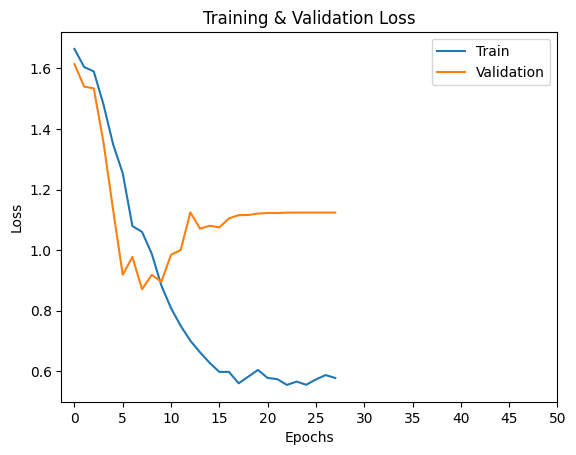

In [ ]:
# Loss plot
plt.plot(acc_level_lstm_model_train.history['loss'], label='Train')
plt.plot(acc_level_lstm_model_train.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0, 55, 5))
plt.legend()
plt.show();

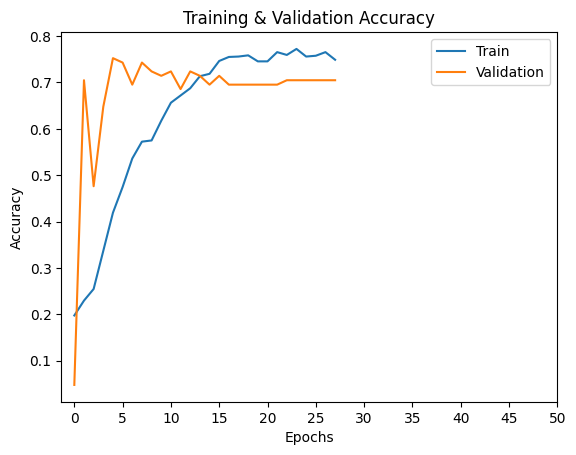

In [ ]:
# Accuracy plot
plt.plot(acc_level_lstm_model_train.history['accuracy'], label='Train')
plt.plot(acc_level_lstm_model_train.history['val_accuracy'], label='Validation')
plt.title('Training & Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 55, 5))
plt.legend()
plt.show();

In [ ]:
# Tensor slicing
train_ds = Dataset.from_tensor_slices((X_train, y_train_ohe))
test_ds = Dataset.from_tensor_slices((X_test, y_test_ohe))

In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -U "tensorflow-text==2.15.*"

In [ ]:
# To define AdamW Optimizer
!pip install "tf-models-official==2.15.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 66.8 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=69348cca2b3171acd773a96986636dccbff8ca135275d344068b280717c9820b
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8

In [ ]:
from tensorflow.keras.optimizers import AdamW
import tensorflow_text as text
from tensorflow_hub import KerasLayer
from tensorflow.keras import Model
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.layers import Input, Dropout, Dense, Bidirectional, LSTM, Embedding, GlobalMaxPooling1D

In [ ]:
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

def build_bert_lstm():
    text_input = Input(shape=(), dtype=string, name='text_input')
    bert_preprocessing = KerasLayer(tfhub_handle_preprocess, name='bert_preprocessing')(text_input)
    bert_encoder = KerasLayer(tfhub_handle_encoder, trainable=False, name='bert_encoder')(bert_preprocessing)

    lstm_1 = Bidirectional(LSTM(128, return_sequences=True))(bert_encoder['sequence_output'])
    lstm_2 = Bidirectional(LSTM(64, return_sequences=True))(lstm_1)
    max_pool = GlobalMaxPooling1D()(lstm_2)

    dropout_1 = Dropout(0.2)(max_pool)
    dense_1 = Dense(64, activation='relu')(dropout_1)

    dropout_2 = Dropout(0.2)(dense_1)
    dense_2 = Dense(32, activation='relu')(dropout_2)

    dropout_3 = Dropout(0.2)(dense_2)
    classifier = Dense(5, activation='softmax', name='classifier')(dropout_3)

    model = Model(text_input, classifier)

    model.compile(
        loss='categorical_crossentropy',
        optimizer=AdamW(learning_rate=3e-5, weight_decay=0.001, epsilon=1e-07),
        metrics=['accuracy', Recall(), Precision()]
    )

    return model

In [ ]:
bert_lstm = build_bert_lstm()
bert_lstm.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None,)]                    0         []                            
                                                                                                  
 bert_preprocessing (KerasL  {'input_word_ids': (None,    0         ['text_input[0][0]']          
 ayer)                       128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [ ]:
callbacks = [
    EarlyStopping(monitor='loss', patience=10, min_delta=1e-2),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1e-6, verbose=1)
]

In [ ]:
bert_lstm_train = bert_lstm.fit(train_ds.batch(32), validation_data=test_ds.batch(32), epochs=100, callbacks=callbacks)

Epoch 1/100
37/37 [==============================] - 82s 2s/step - loss: 1.6930 - accuracy: 0.1671 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.5914 - val_accuracy: 0.1048 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - lr: 3.0000e-05
Epoch 2/100
37/37 [==============================] - 64s 2s/step - loss: 1.6238 - accuracy: 0.2017 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.5761 - val_accuracy: 0.1810 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - lr: 3.0000e-05
Epoch 3/100
37/37 [==============================] - 64s 2s/step - loss: 1.6097 - accuracy: 0.2165 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.5425 - val_accuracy: 0.4762 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - lr: 3.0000e-05
Epoch 4/100
37/37 [==============================] - 64s 2s/step - loss: 1.5809 - accuracy: 0.2537 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.5121 - val_accuracy: 0.6190 - val_recall: 0.0000e+00 - val_precision: 0.00

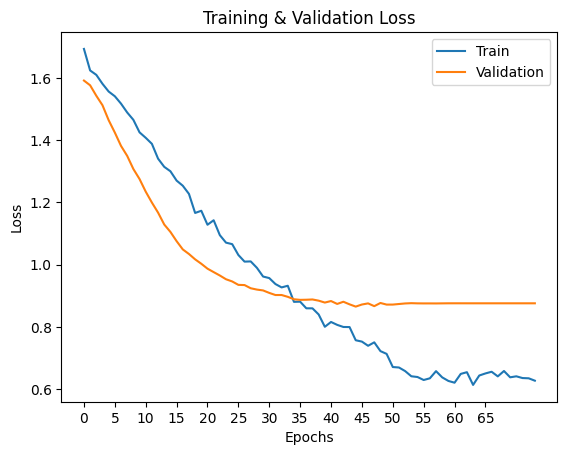

In [ ]:
# Loss plot
plt.plot(bert_lstm_train.history['loss'], label='Train')
plt.plot(bert_lstm_train.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0, 70, 5))
plt.legend()
plt.show();

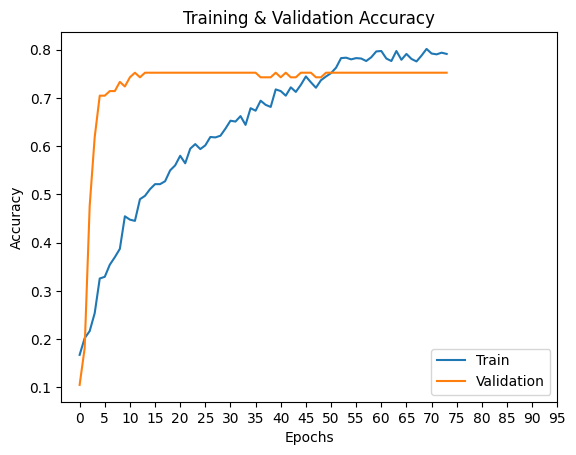

In [ ]:
# Accuracy plot
plt.plot(bert_lstm_train.history['accuracy'], label='Train')
plt.plot(bert_lstm_train.history['val_accuracy'], label='Validation')
plt.title('Training & Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 100, 5))
plt.legend()
plt.show();

In [ ]:
print('Training Performance:')
train_results = bert_lstm.evaluate(train_ds)
print('loss', train_results[0])
print('accuracy', train_results[1])

Training Performance:
1155/1155 [==============================] - 199s 170ms/step - loss: 0.5026 - accuracy: 0.8511 - recall: 0.7905 - precision: 0.8899
loss 0.5025538802146912
accuracy 0.8510822653770447


In [ ]:
print('Testing Performance:')
test_results = bert_lstm.evaluate(test_ds)
print('loss', test_results[0])
print('accuracy', test_results[1])

Testing Performance:
105/105 [==============================] - 18s 170ms/step - loss: 0.8757 - accuracy: 0.7524 - recall: 0.7143 - precision: 0.7500
loss 0.8757138848304749
accuracy 0.7523809671401978


In [ ]:
NN_Model_Results.loc[5] = ["LSTM (BERT)", train_results[0], test_results[0], train_results[1], test_results[1]]

In [ ]:
NN_Model_Results

,Model Name,Training Loss,Testing Loss,Training Accuracy,Testing Accuracy
0,ANN Model Initial (TF-IDF),0.3496,0.8695,0.8857,0.7238
1,ANN Model Modified (TF-IDF),0.0104,1.6336,0.9974,0.6857
2,RNN Model (Word2vec),0.1607,0.1648,0.1974,0.0952
3,RNN Model (GLOVE),0.1598,0.1605,0.2035,0.0857
4,LSTM Model (GLOVE),0.3820,1.1155,0.8468,0.7048
5,LSTM (BERT),0.5026,0.8757,0.8511,0.7524


The models LSTM using BERT is the top performer. We will create the classification report and the confusion matrix for the same.

In [ ]:
# Predicting the model on test data
y_pred_lstm = bert_lstm.predict(X_test)

# Getting the predicted output in a list
y_pred_lstm_final = []
for i in y_pred_lstm:
    y_pred_lstm_final.append(np.argmax(i))

4/4 [==============================] - 7s 1s/step


In [ ]:
# Creating classification report for the test data
print(classification_report(y_test_le, y_pred_lstm_final))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        78
           1       1.00      0.20      0.33        10
           2       0.00      0.00      0.00         8
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         2

    accuracy                           0.75       105
   macro avg       0.55      0.26      0.29       105
weighted avg       0.73      0.75      0.68       105



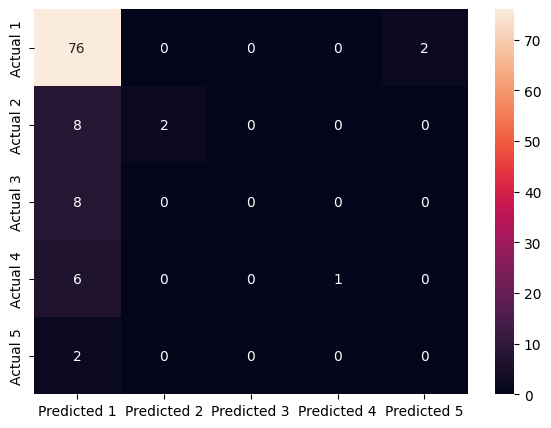

In [ ]:
# Creating Confusion Matrix for the test data
# Creating confusion matrix
c_matrix = metrics.confusion_matrix(y_test_le, y_pred_lstm_final)

df_cmatrix = pd.DataFrame(c_matrix, index = [i for i in ["Actual 1","Actual 2","Actual 3","Actual 4","Actual 5"]],
                  columns = [i for i in ["Predicted 1","Predicted 2","Predicted 3","Predicted 4","Predicted 5"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cmatrix, annot = True, fmt = 'g')
plt.show()

From the test accuracy, we can compare all the models and conclude that, the LSTM model with the BERT is the best performing classifier, we will pickle the model.

In [ ]:
bert_lstm.save(f'{PROJECT_DIR}/models/bert_lstm_copy/bert_lstm_model', save_format='tf')

# Final verdict on the classification model

The best classifier is the LSTM model with BERT.

Got almost 75% of Accuracy for the testing data. The accuracy for training data was close to 85%. Seeing both the numbers, we can be confident that this is a good fit.

The testing confusion matrix for the same model shows just 26 misclassification.

The RNN model with GLOVE and Word2vec are the worst performer.

The ANN models with TFIDF showed decent performance with 72% and 68% testing accuracy.